In [1]:
from google.colab import drive
drive.mount('/content/drive')
#mounting google drive

Mounted at /content/drive


In [2]:
import zipfile
!unzip /content/drive/MyDrive/sp500_tickers_A-D_1min_1pppix.zip
#unzipping the zip file located in gdrive

Archive:  /content/drive/MyDrive/sp500_tickers_A-D_1min_1pppix.zip
  inflating: sp500_tickers_A-D_1min_1pppix/A_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/AA_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/AAL_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/AAP_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/AAPL_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ABBV_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ABC_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ABMD_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ABT_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ACN_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ACV_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ADBE_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ADI_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ADM_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ADP_1min.txt  
  inflating: sp500_tickers_A-D_1min_1pppix/ADS_1min.txt  
  in

In [3]:
File_paths = '/content/sp500_tickers_A-D_1min_1pppix'

In [4]:
import os
import pandas as pd
dir_list = os.listdir(File_paths) #lists all files located in specified path
c=0
print(dir_list)
for nam in dir_list[:10]:
  filee_path = os.path.join(File_paths,nam)#joins two paths
  filee = open(filee_path,"r")#opens file located at this path
  filee.read()#reads the file
  globals()[f'{nam[:-9]}'] = pd.read_csv(filee_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], delimiter=',')#global()makes string as variable and code makes that variable into a pandas dataframe
  globals()[f'{nam[:-9]}']['Timestamp'] = pd.to_datetime(globals()[f'{nam[:-9]}']['Timestamp'])#make stime stamp
  globals()[f'{nam[:-9]}'].set_index('Timestamp', inplace=True)
  c=c+1
  print(f'{int((c/10)*100)}% completed')#percentage completed

['AVGO_1min.txt', 'DIS_1min.txt', 'BLL_1min.txt', 'CF_1min.txt', 'BMY_1min.txt', 'CNX_1min.txt', 'CMS_1min.txt', 'CDNS_1min.txt', 'ANTM_1min.txt', 'BR_1min.txt', 'ABT_1min.txt', 'ABMD_1min.txt', 'CPB_1min.txt', 'CCI_1min.txt', 'ATVI_1min.txt', 'ASO_1min.txt', 'BRO_1min.txt', 'CTLT_1min.txt', 'DOW_1min.txt', 'AMZN_1min.txt', 'BA_1min.txt', 'ABBV_1min.txt', 'CCK_1min.txt', 'DE_1min.txt', 'AEE_1min.txt', 'ANF_1min.txt', 'ARE_1min.txt', 'COP_1min.txt', 'CZR_1min.txt', 'CHTR_1min.txt', 'AMP_1min.txt', 'DD_1min.txt', 'AXP_1min.txt', 'BBY_1min.txt', 'ADP_1min.txt', 'ALTR_1min.txt', 'ARNC_1min.txt', 'CNC_1min.txt', 'CNP_1min.txt', 'D_1min.txt', 'COO_1min.txt', 'CE_1min.txt', 'BIG_1min.txt', 'DXCM_1min.txt', 'AMD_1min.txt', 'CFG_1min.txt', 'CMI_1min.txt', 'DISCA_1min.txt', 'CRM_1min.txt', 'DRI_1min.txt', 'DAL_1min.txt', 'DLX_1min.txt', 'A_1min.txt', 'CAG_1min.txt', 'AIZ_1min.txt', 'COF_1min.txt', 'ALB_1min.txt', 'CSX_1min.txt', 'CPRT_1min.txt', 'BIDU_1min.txt', 'DG_1min.txt', 'CHRW_1min.txt', '

1-(a) - plot the minute-by-minute closing price series of a few stocks.

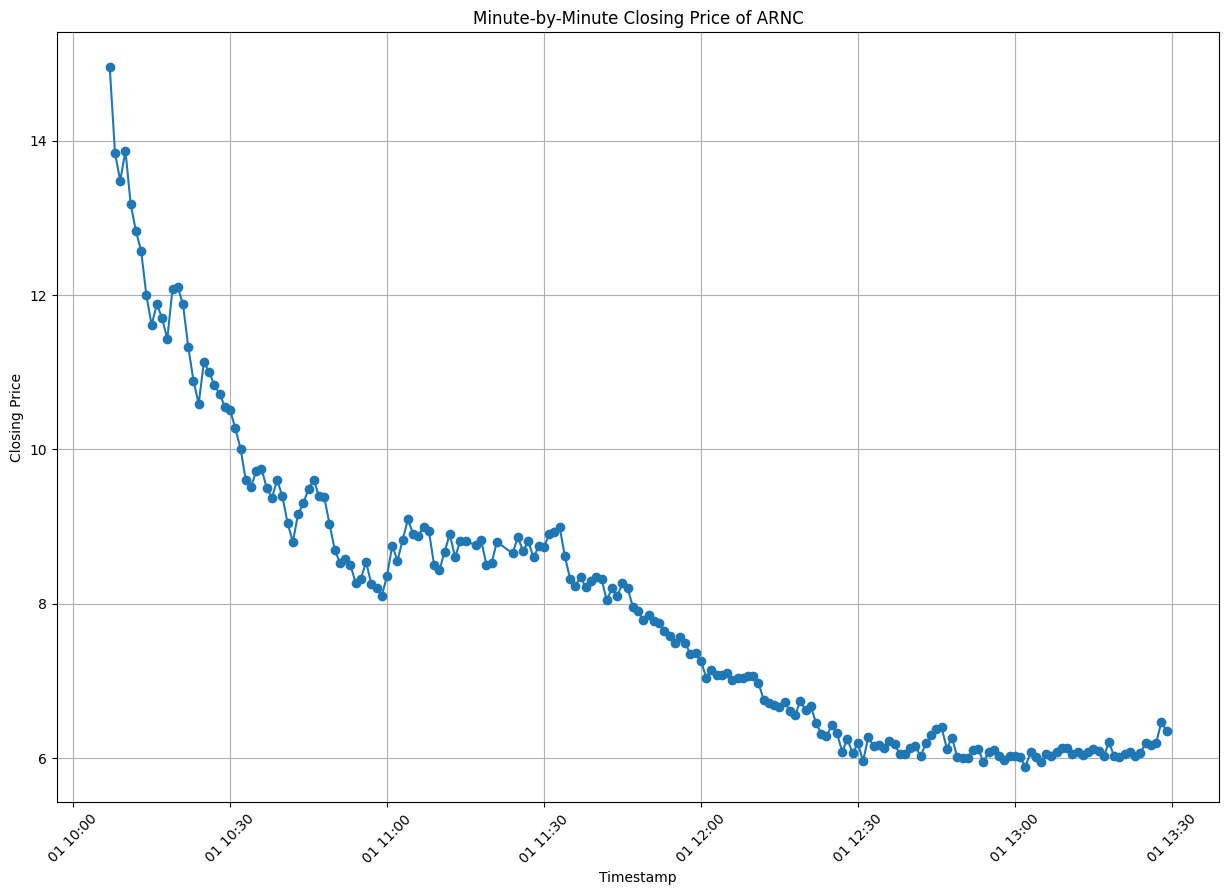

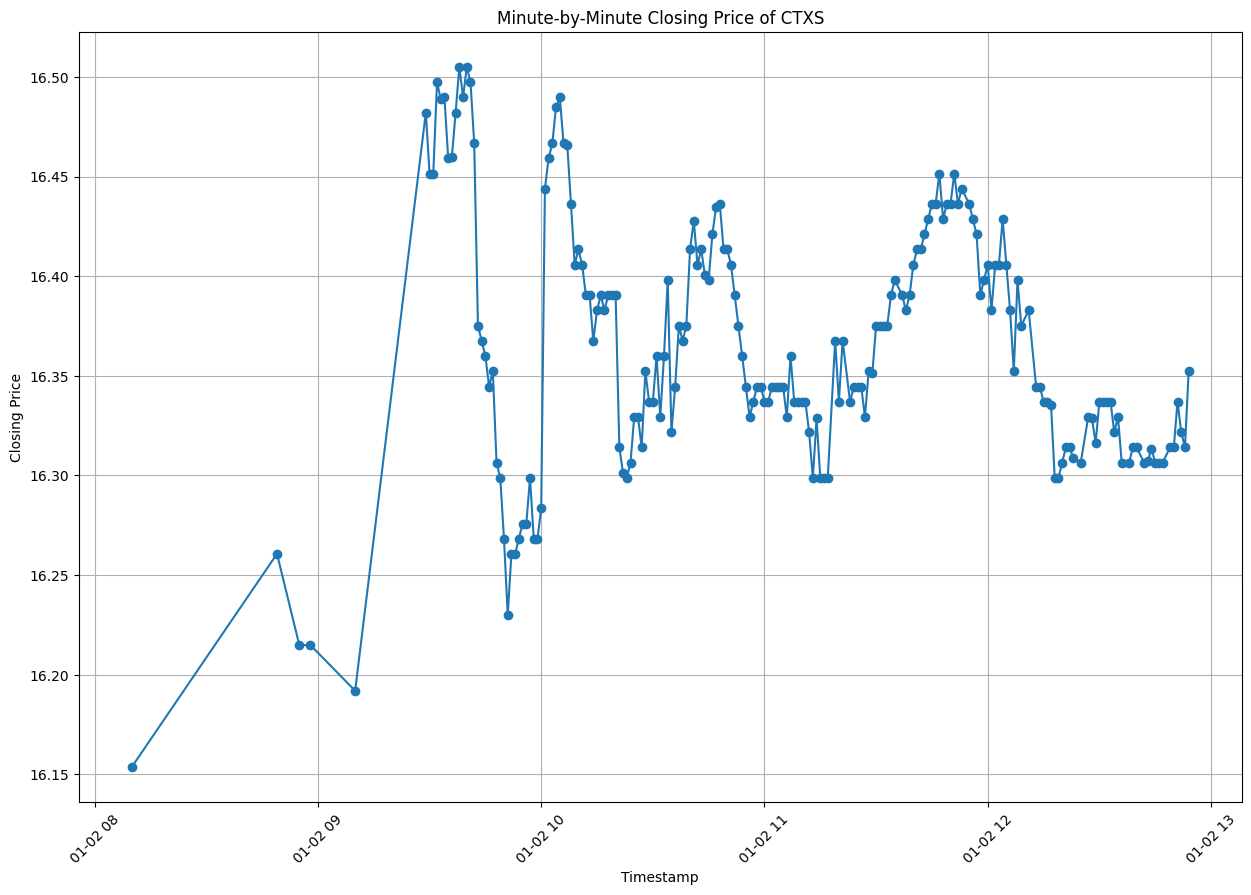

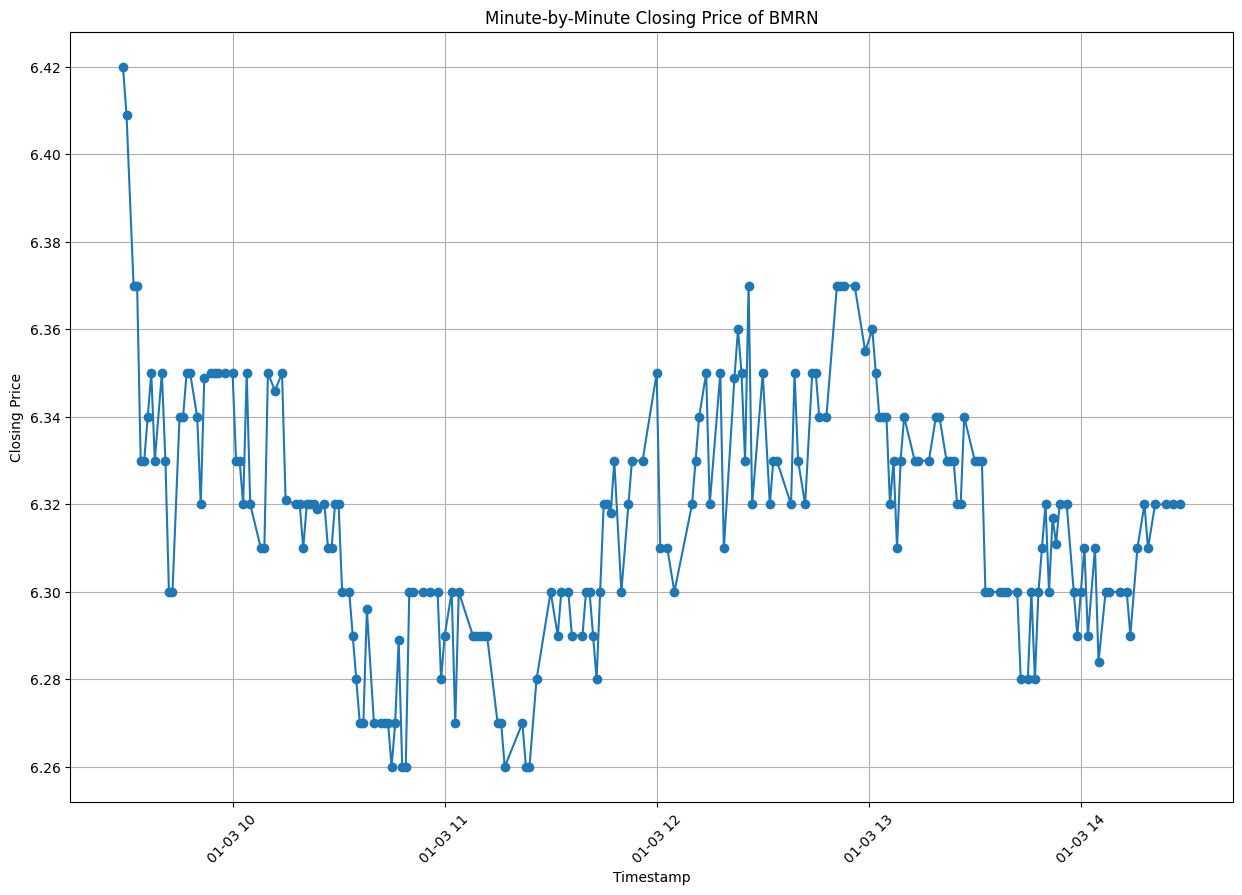

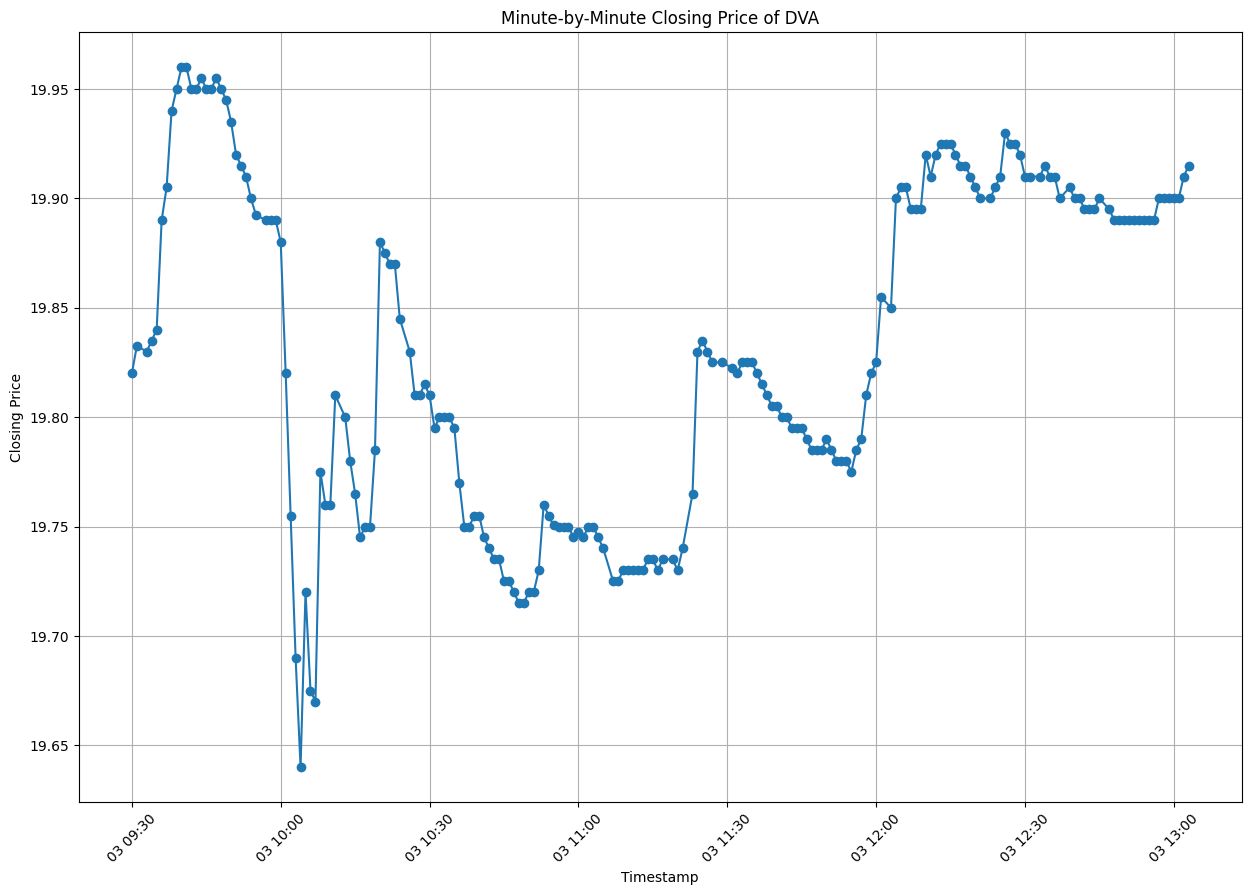

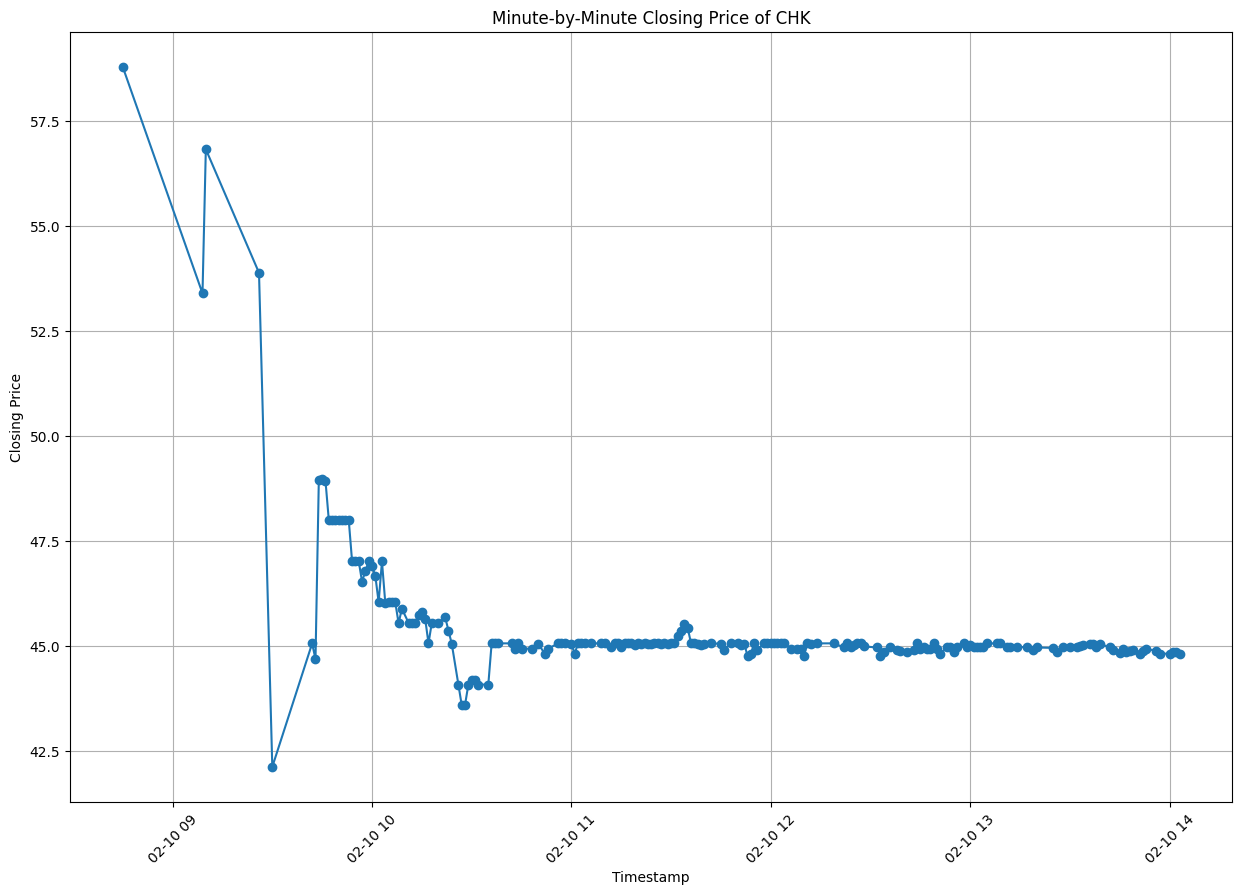

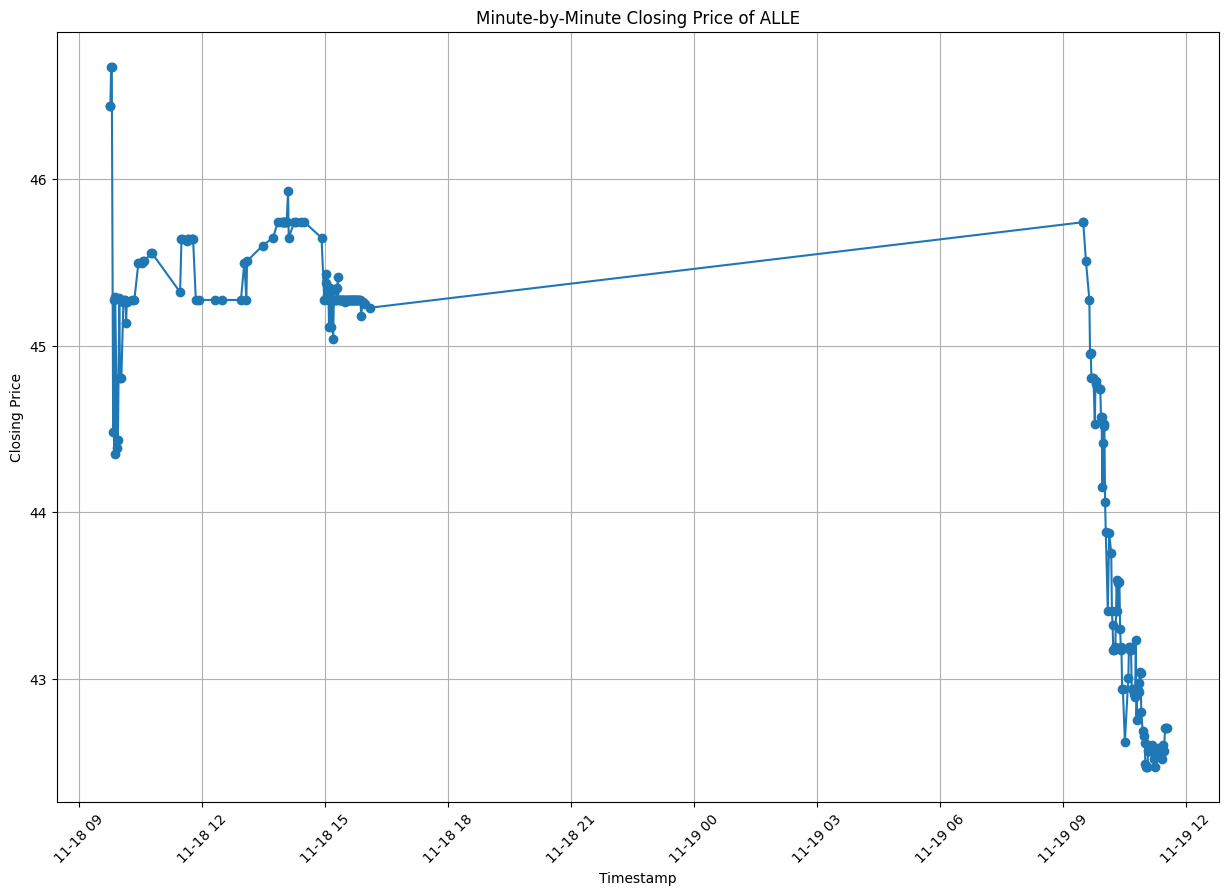

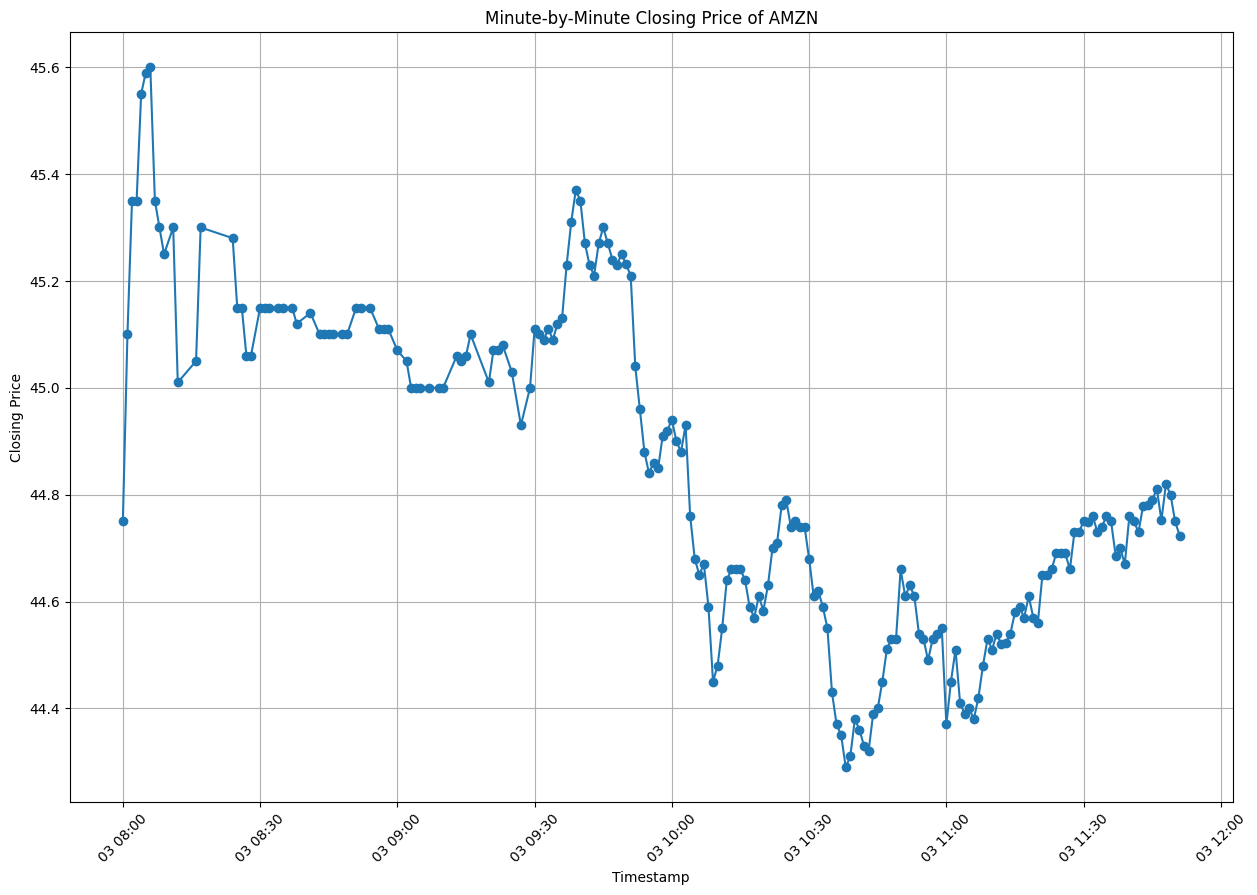

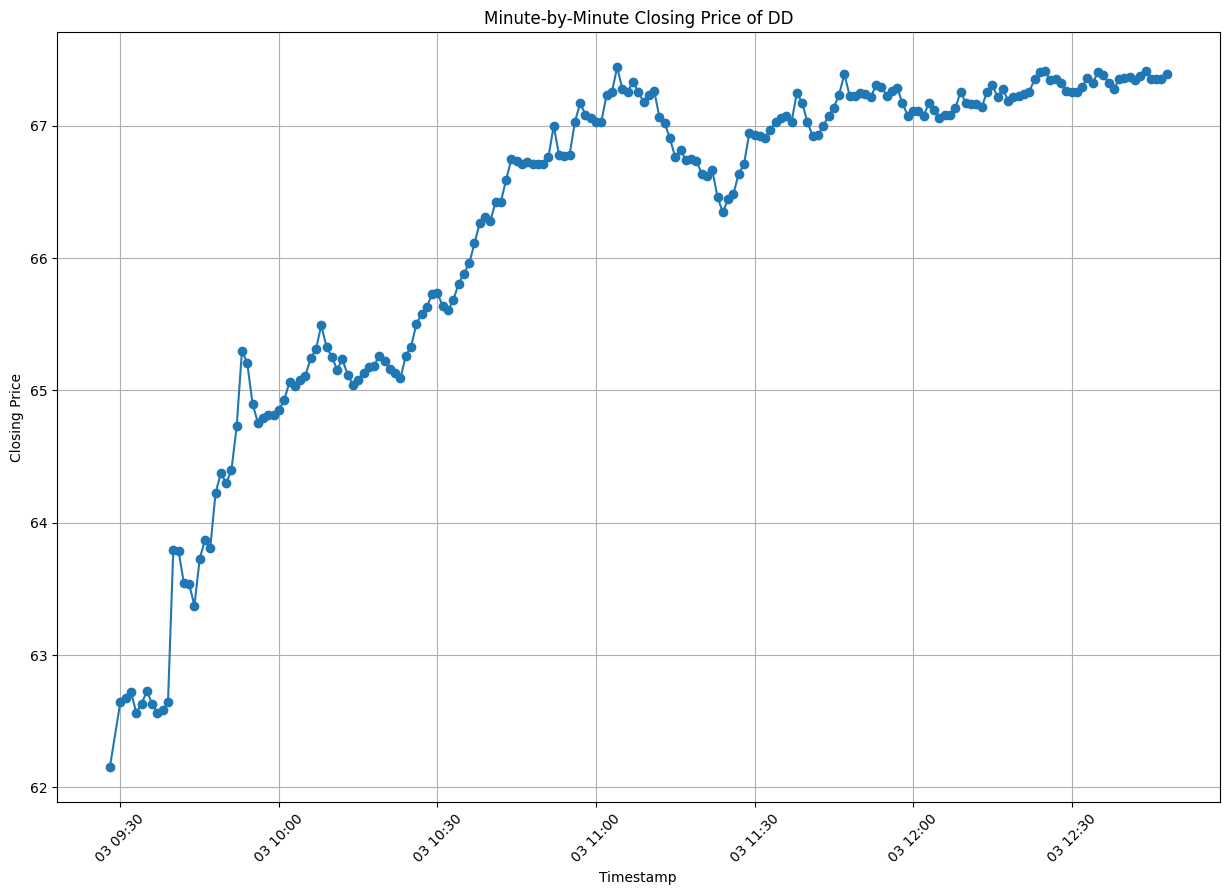

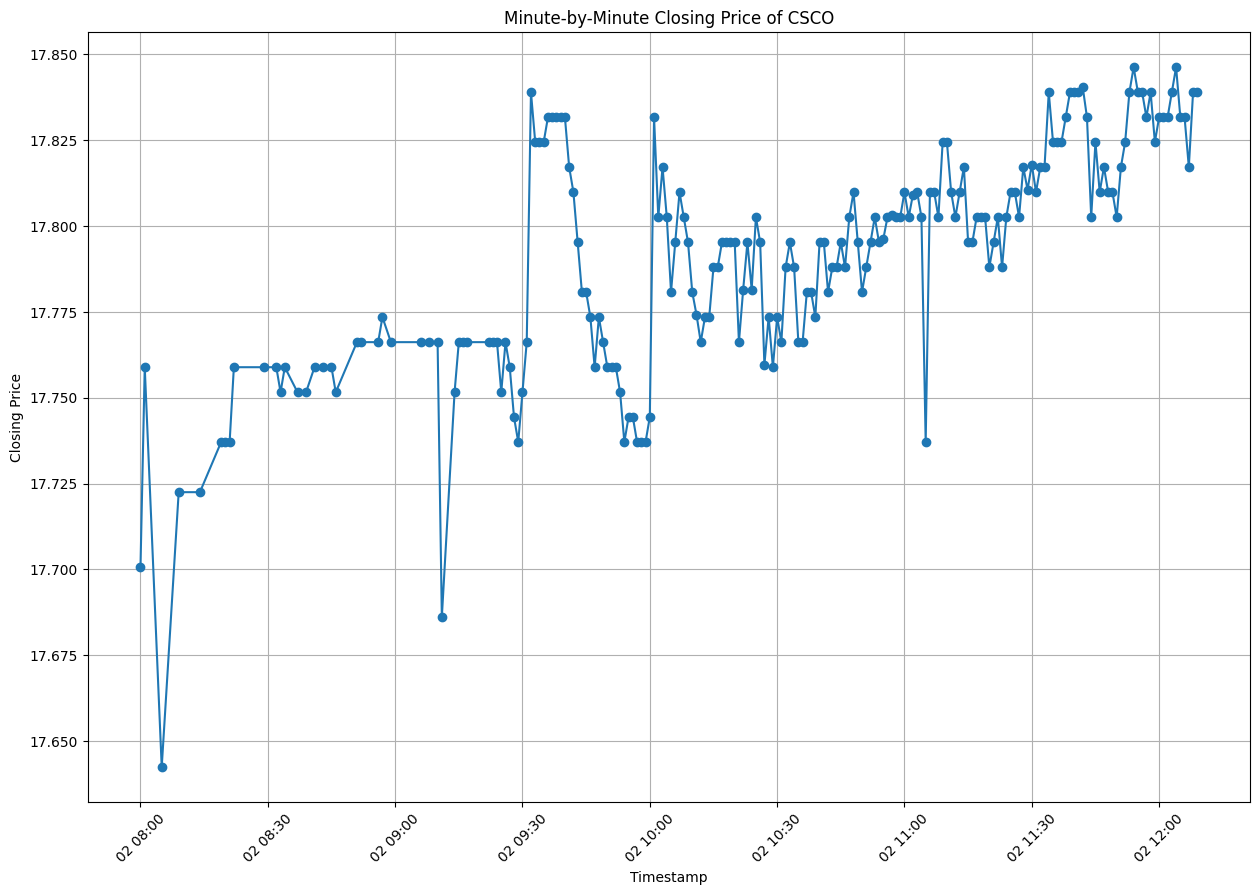

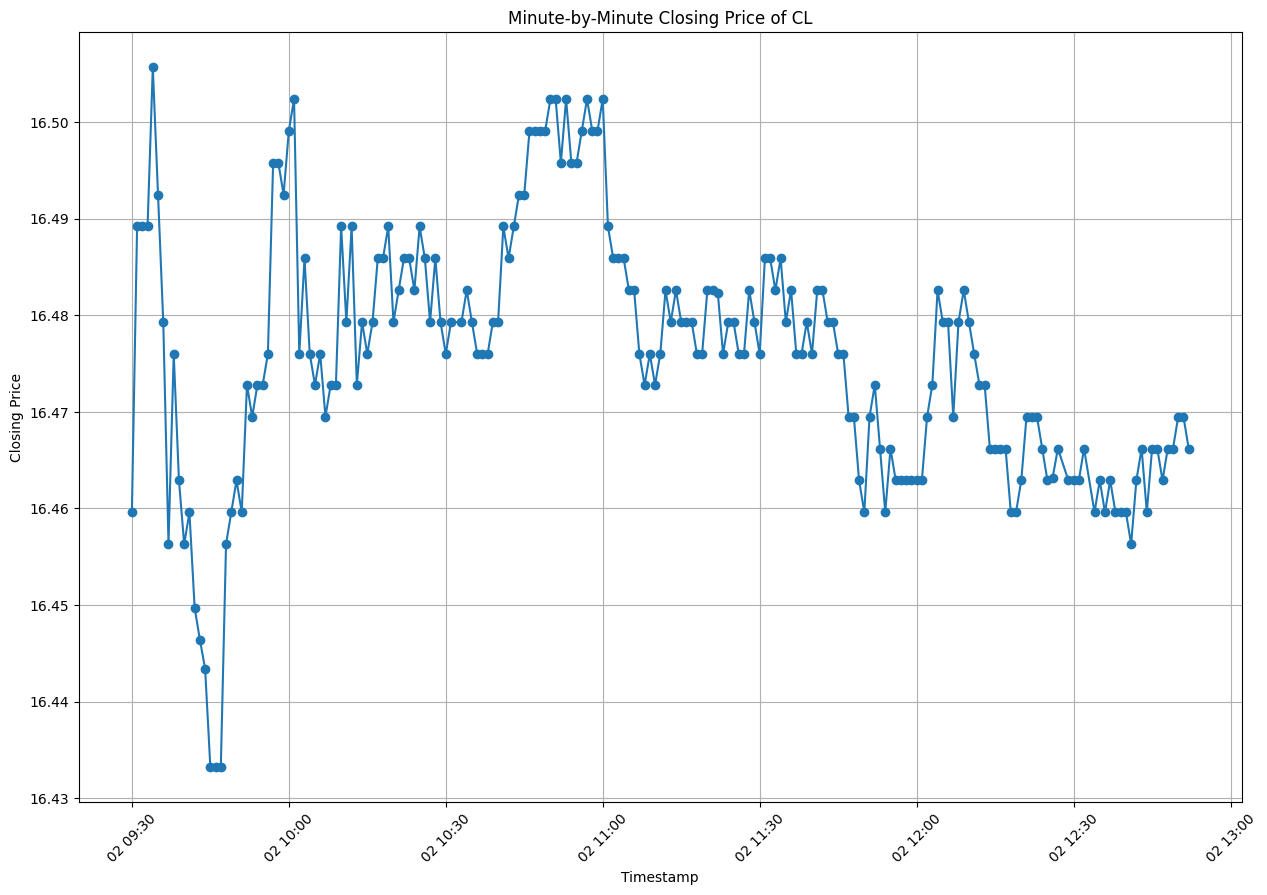

In [5]:
import matplotlib.pyplot as plt

# Plot the minute-by-minute closing price
for nam in dir_list[:10]:
  plt.figure(figsize=(15, 10))
  plt.plot(globals()[f'{nam[:-9]}'].index[:200], globals()[f'{nam[:-9]}']['Close'][:200], marker='o', linestyle='-')#plotting time vs closing price plot minute wise
  plt.title(f'Minute-by-Minute Closing Price of {nam[:-9]}')
  plt.xlabel('Timestamp')
  plt.ylabel('Closing Price')
  plt.grid(True)
  plt.xticks(rotation=45)

  plt.show()



1-(b) - plot the day-by-day closing price series of a few stocks.

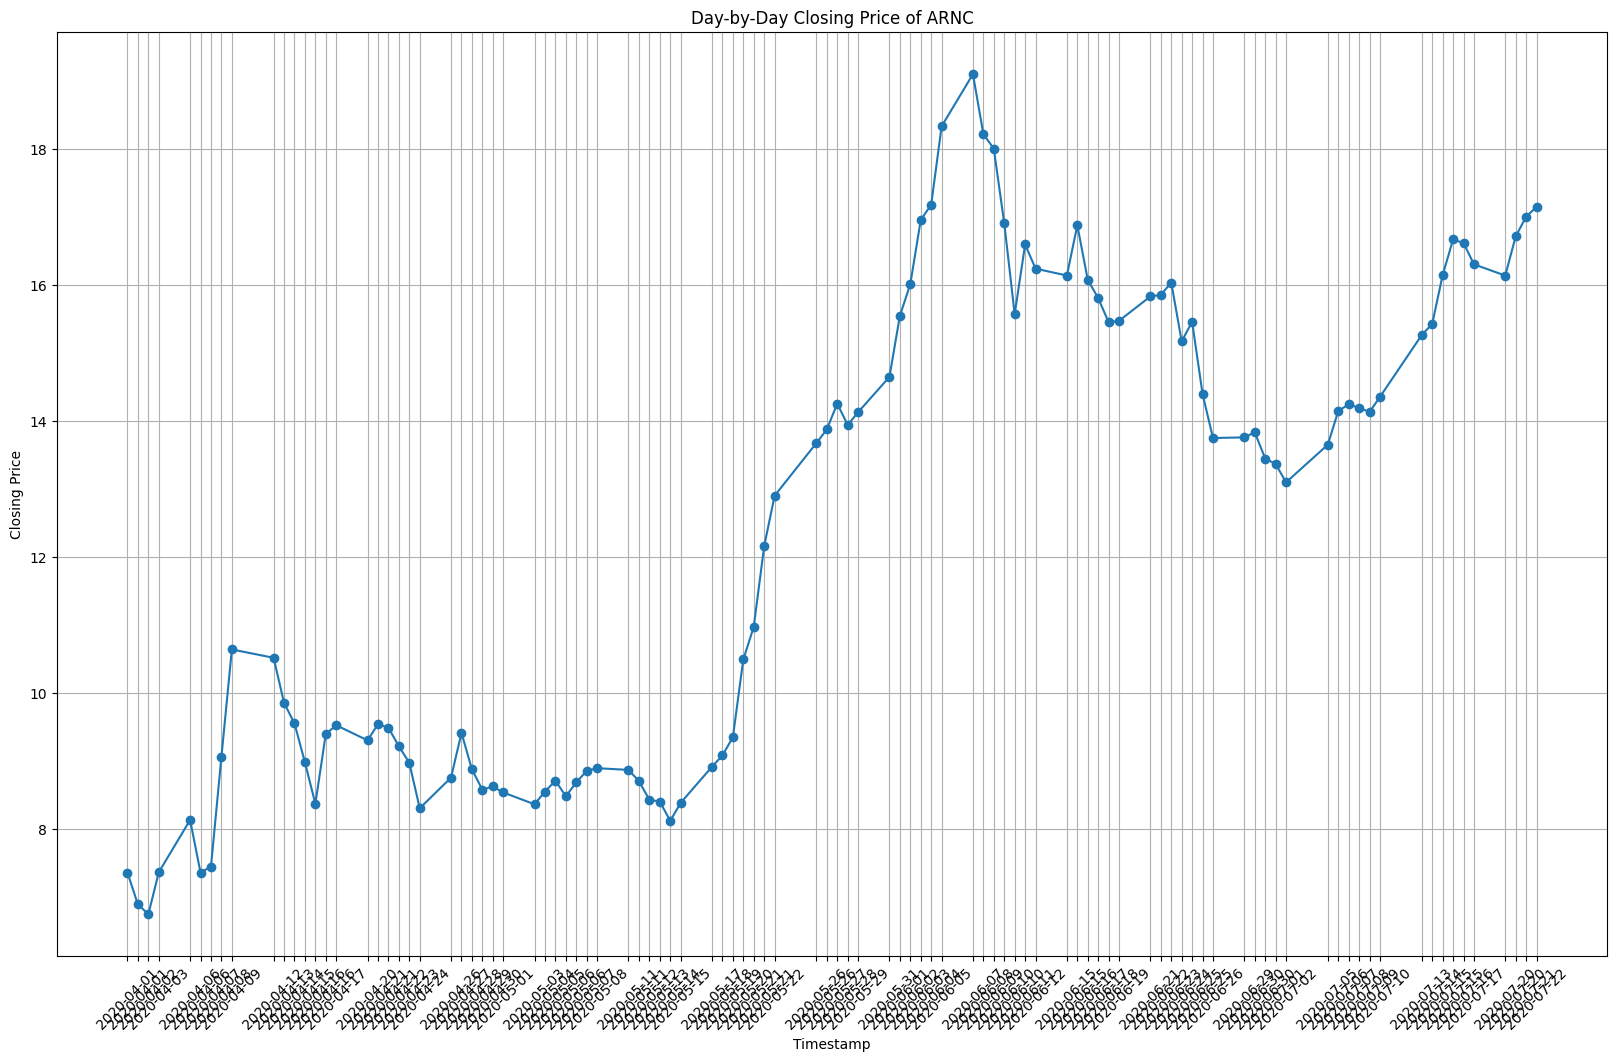

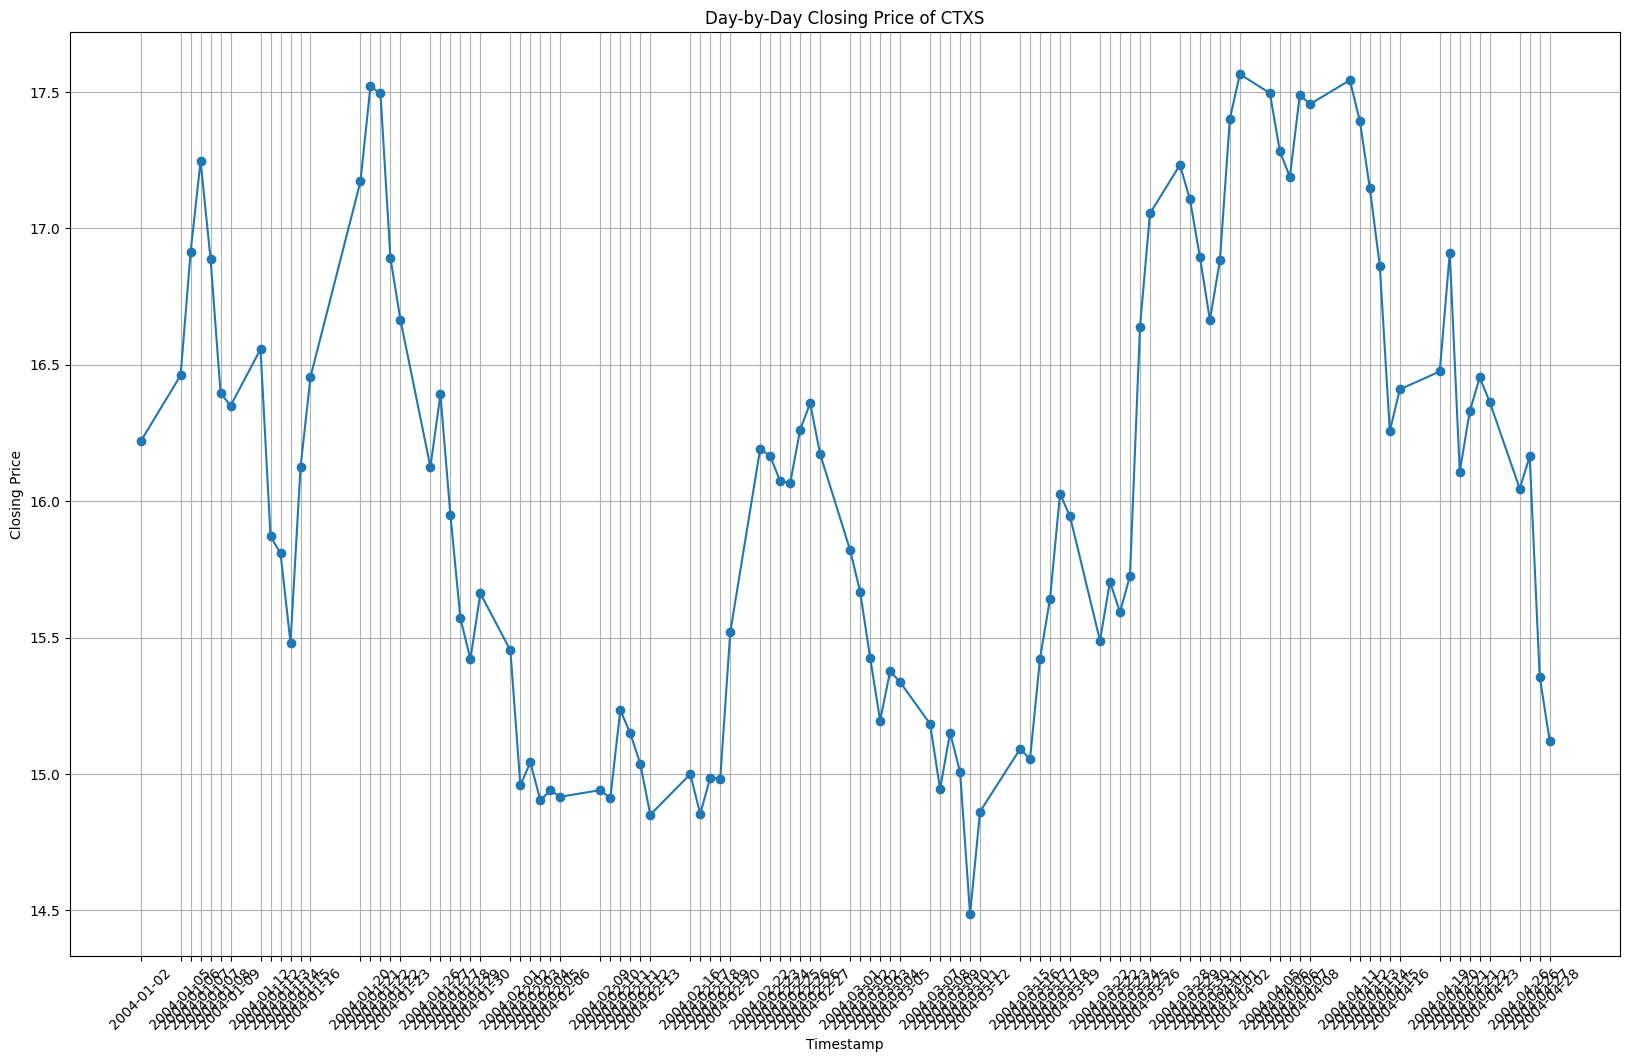

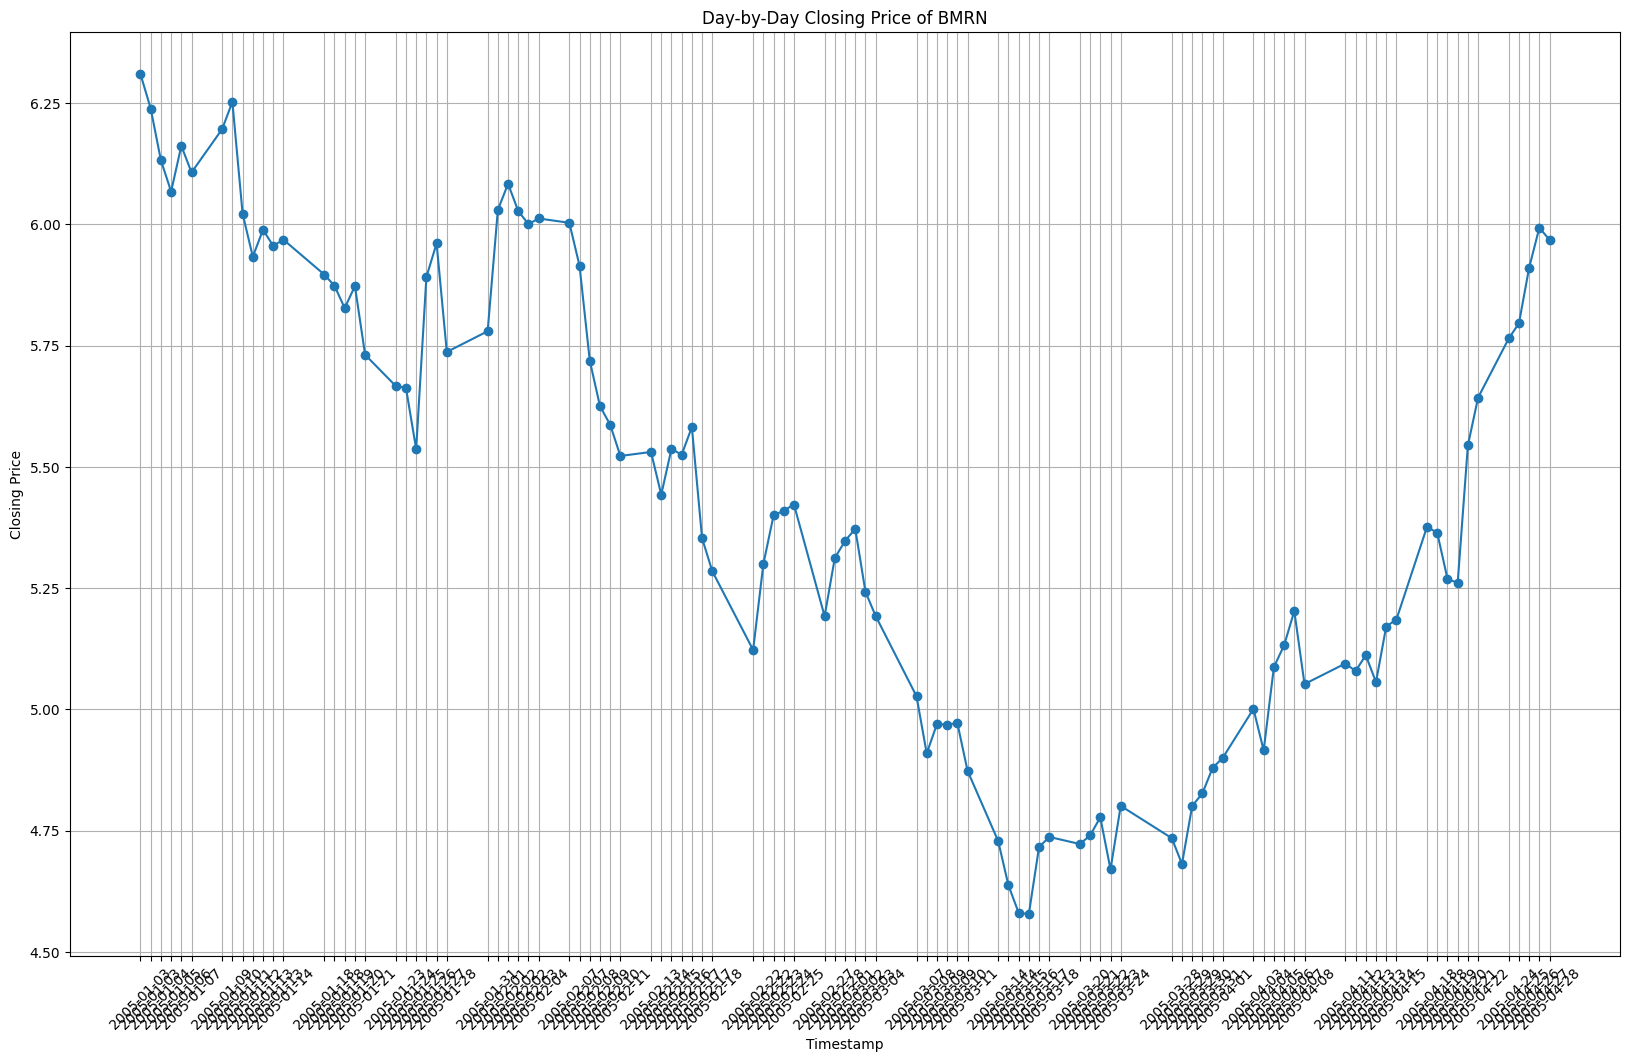

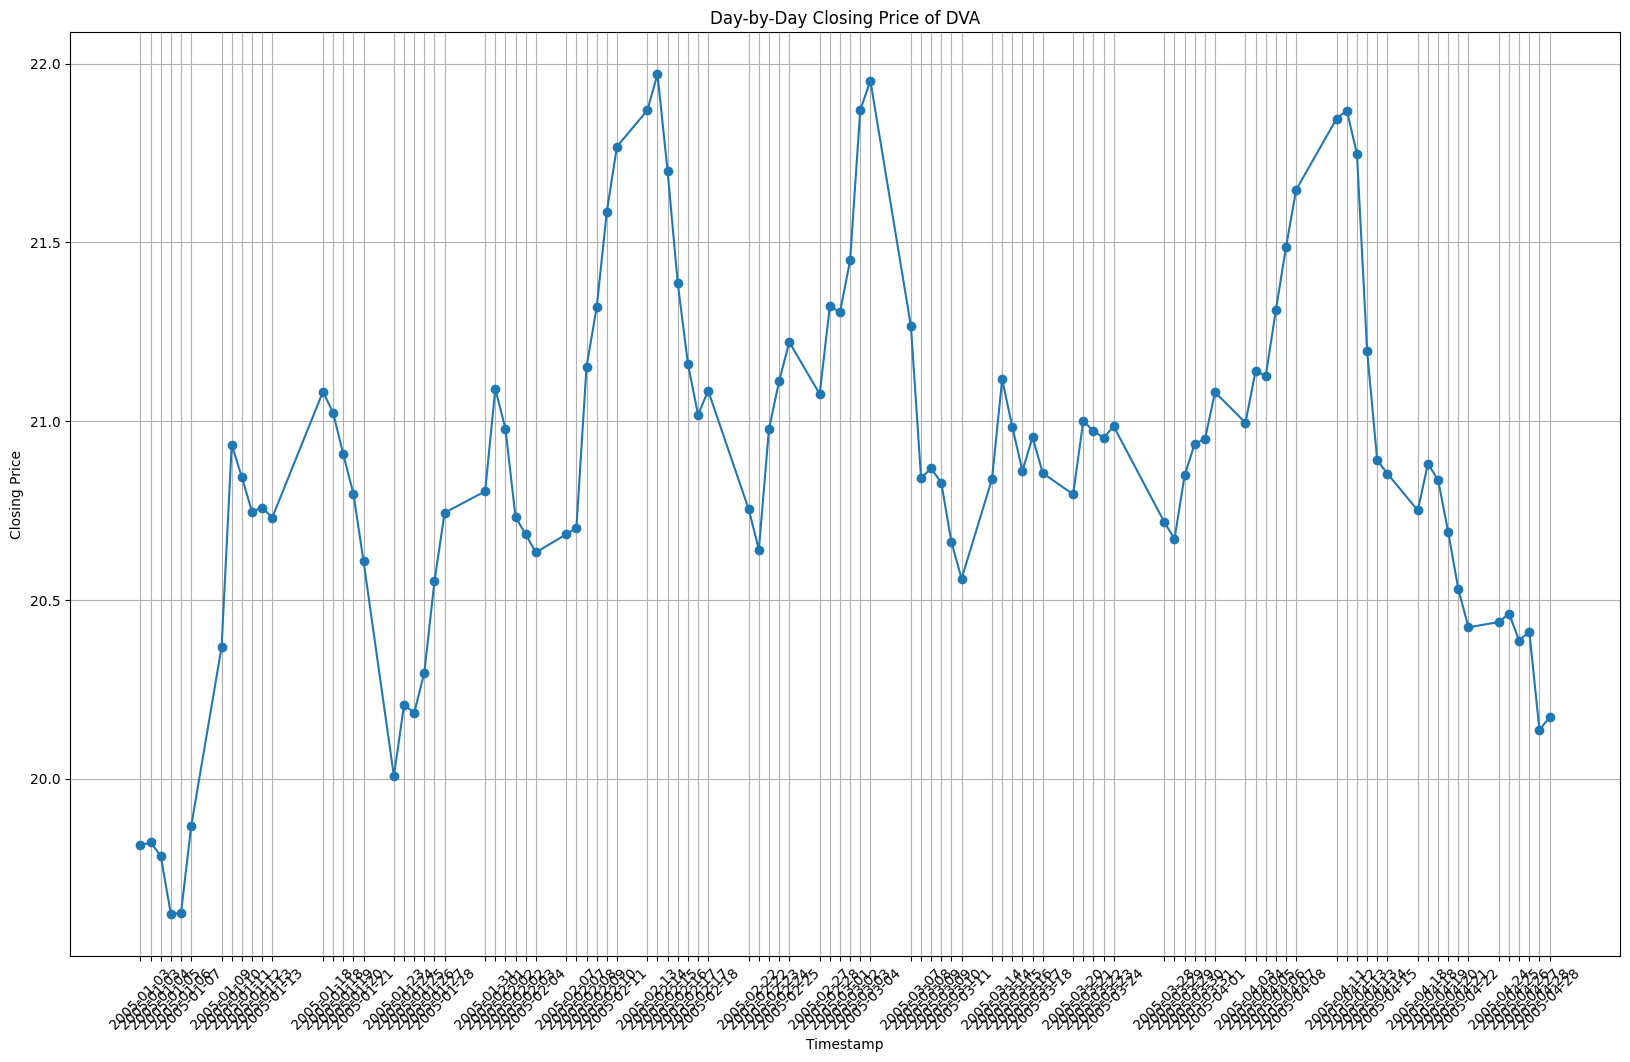

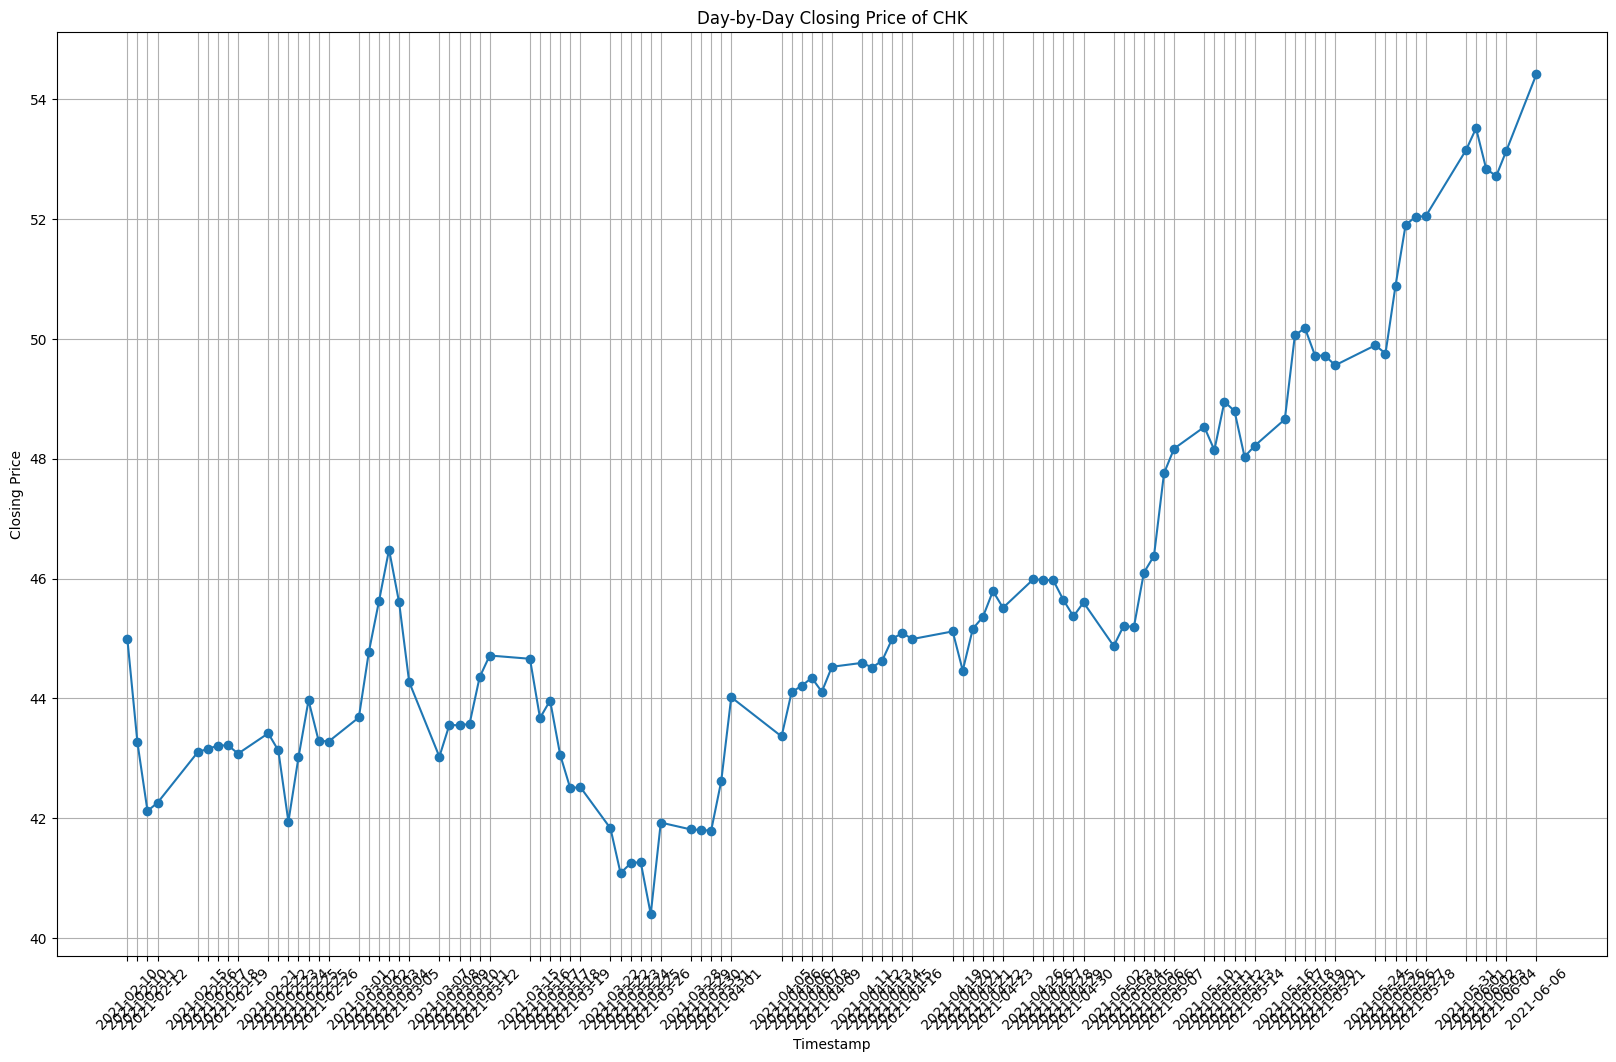

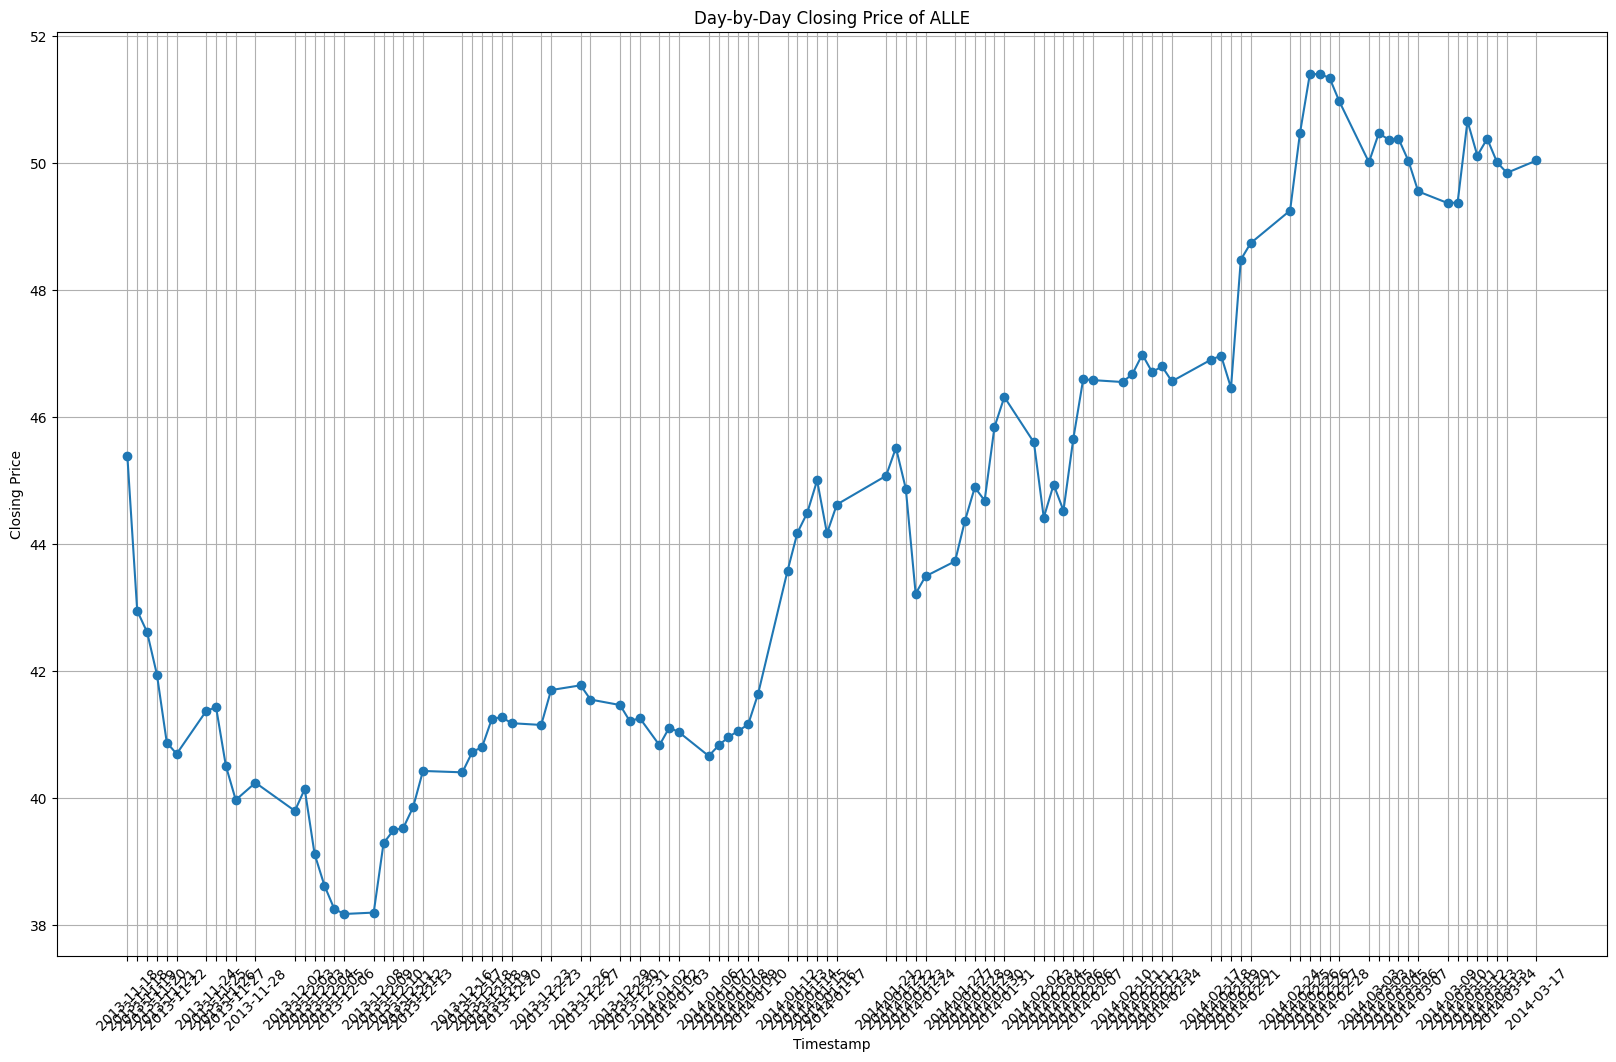

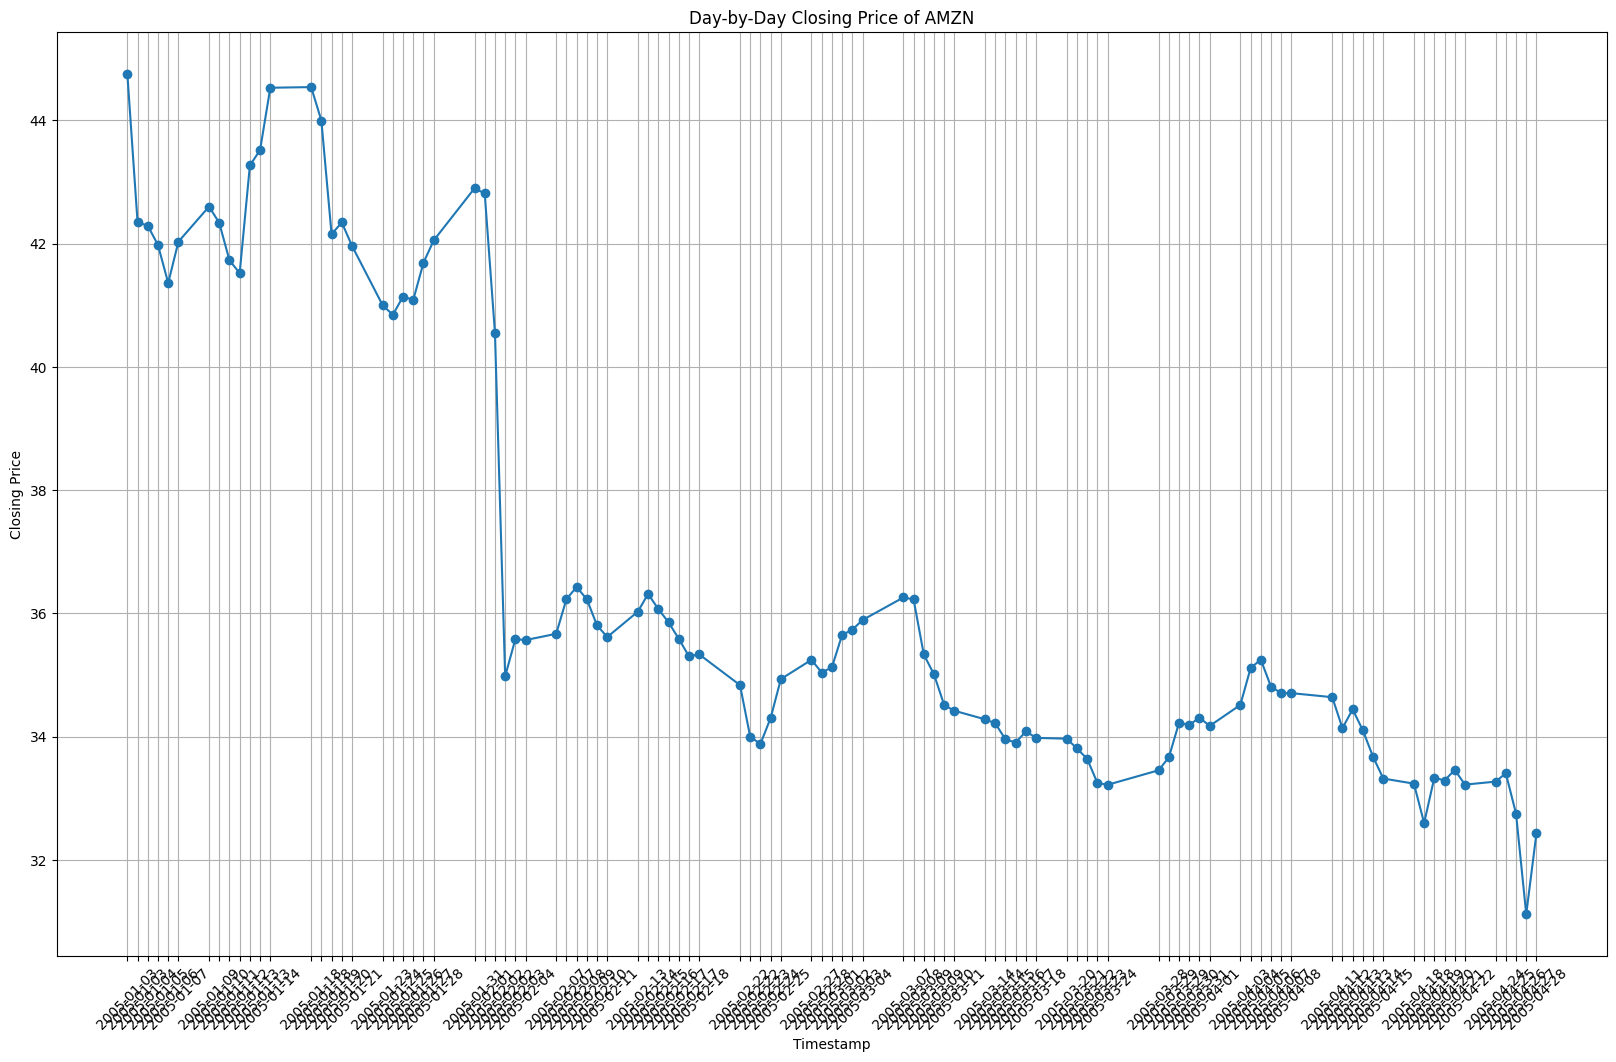

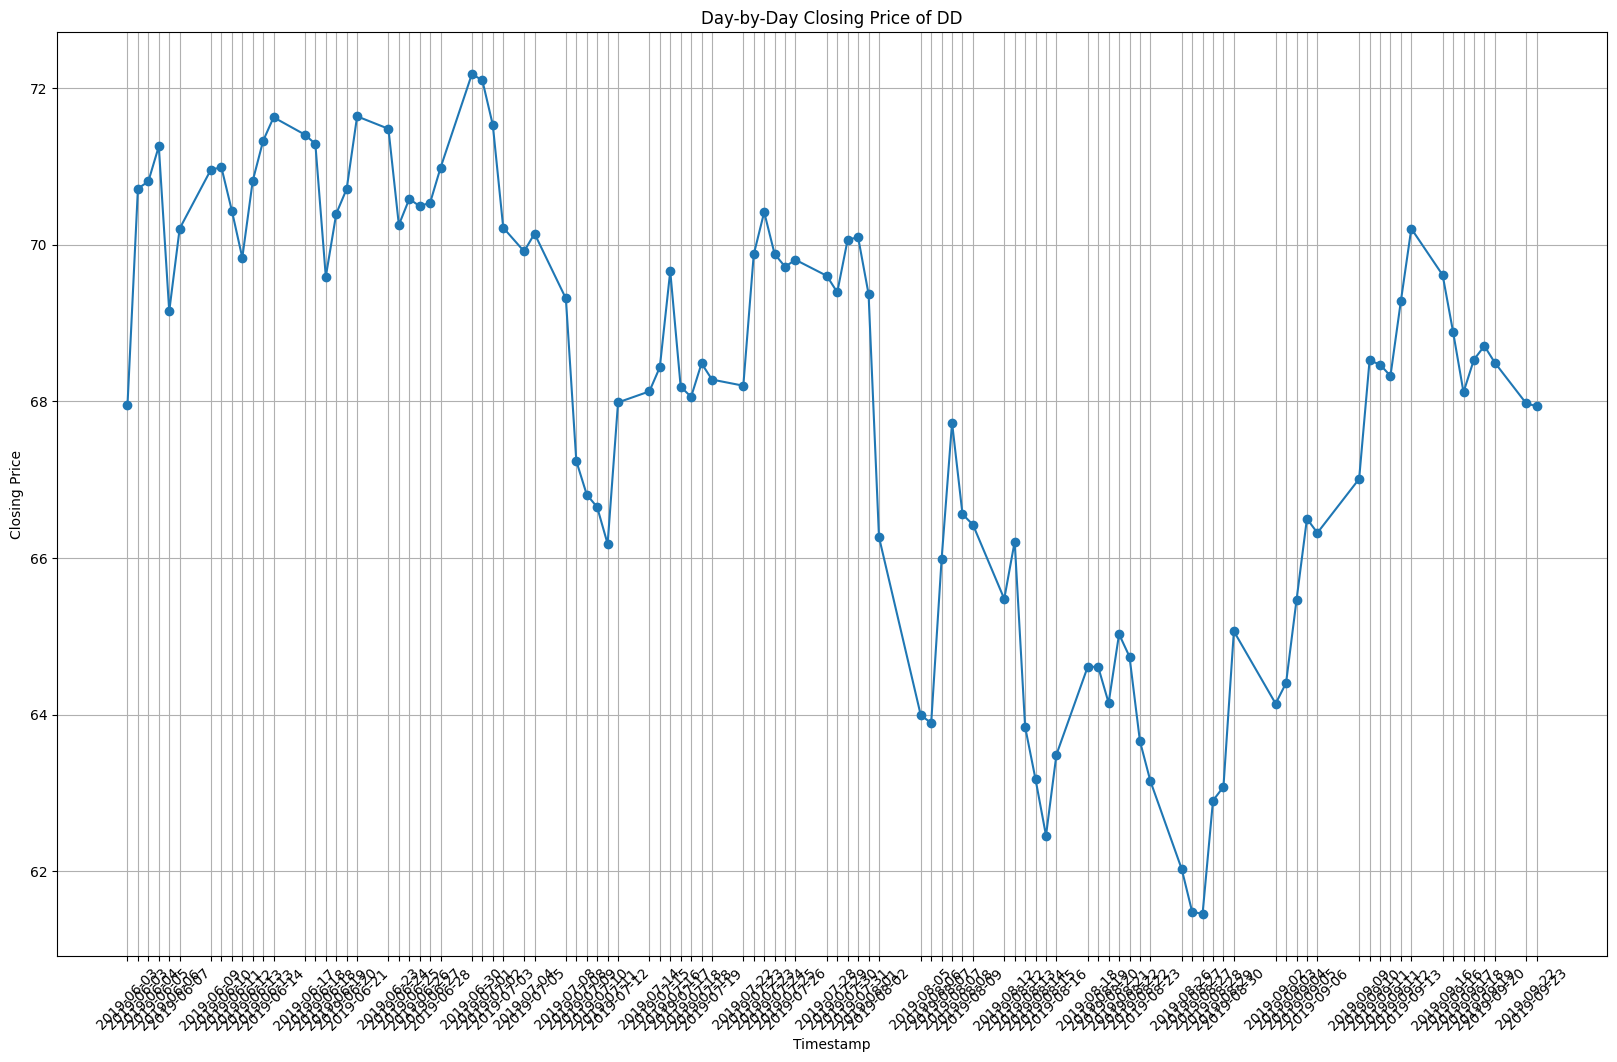

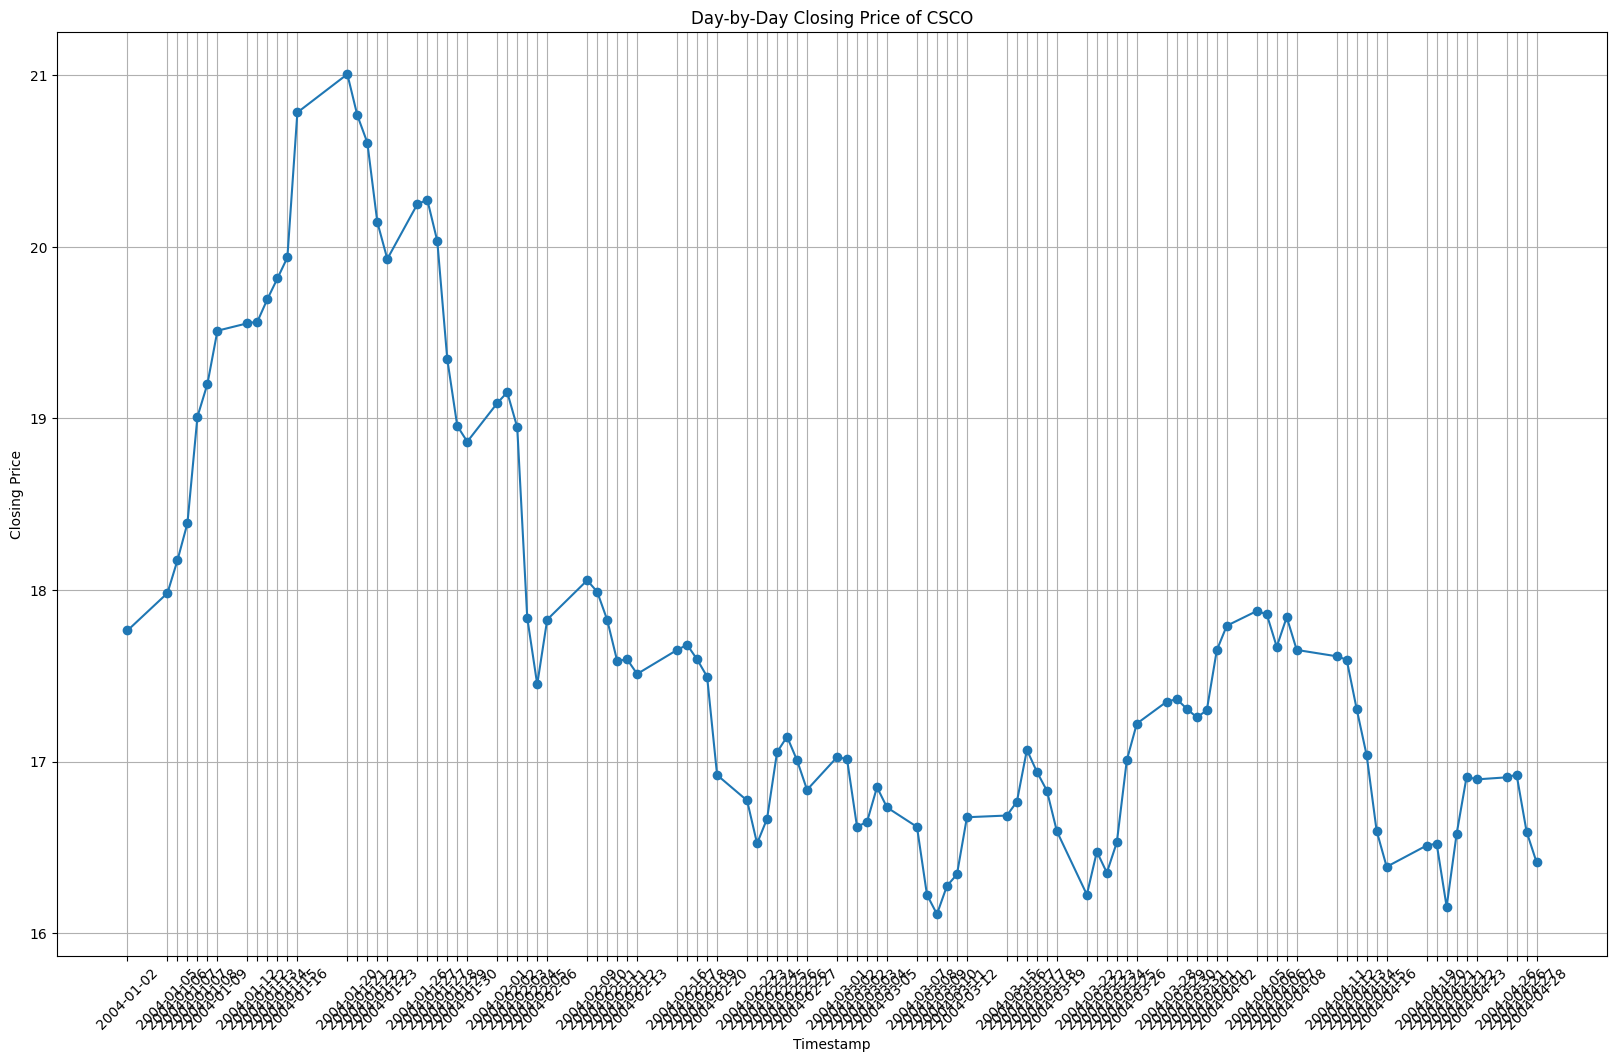

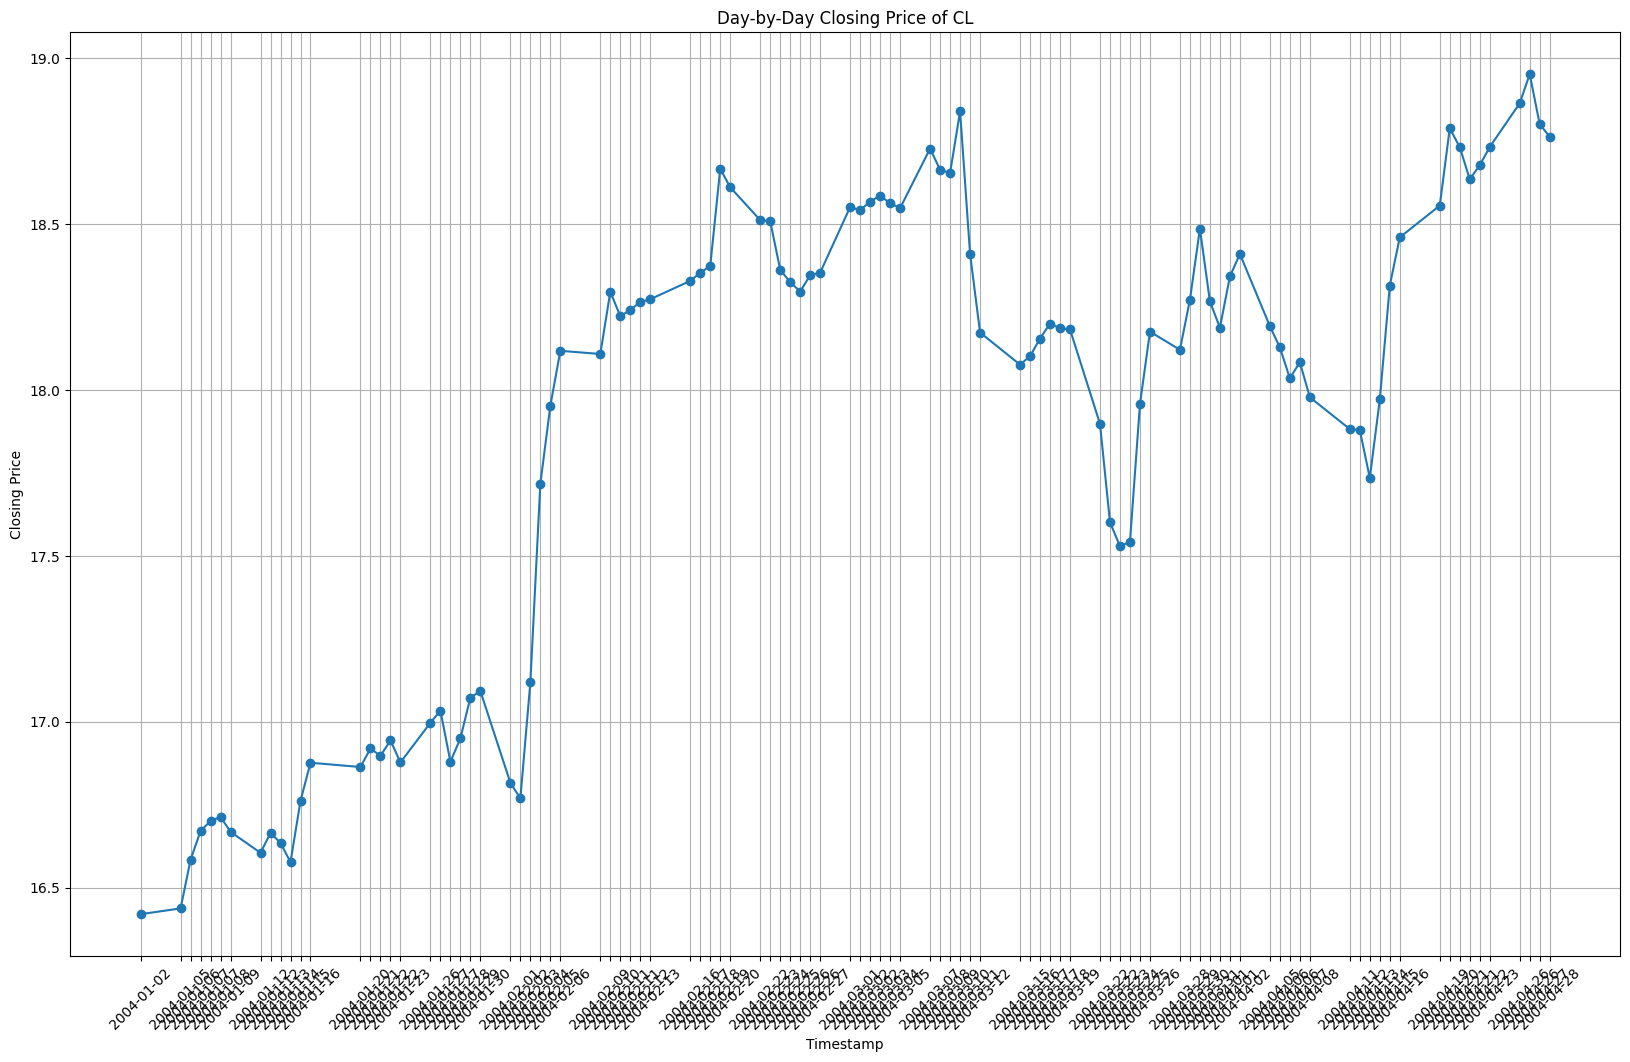

In [6]:
for nam in dir_list[:10]:
  df_resampled = globals()[f'{nam[:-9]}'].resample('1200T').mean()# sampling data once a day
  df_resampled = df_resampled.dropna()
  plt.figure(figsize=(20, 12))
  plt.plot(df_resampled.index[:100],df_resampled['Close'][:100], marker='o', linestyle='-')#plotting time vs closing price plot day wise
  plt.xticks(df_resampled.index[:100])
  plt.title(f'Day-by-Day Closing Price of {nam[:-9]}')
  plt.xlabel('Timestamp')
  plt.ylabel('Closing Price')
  plt.grid(True)
  plt.xticks(rotation=45)

  plt.show()

In [7]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


1-(c) - Plot  complete candlestick chart with volume on secondary y-axis for a few stocks with aa time period of your choice.

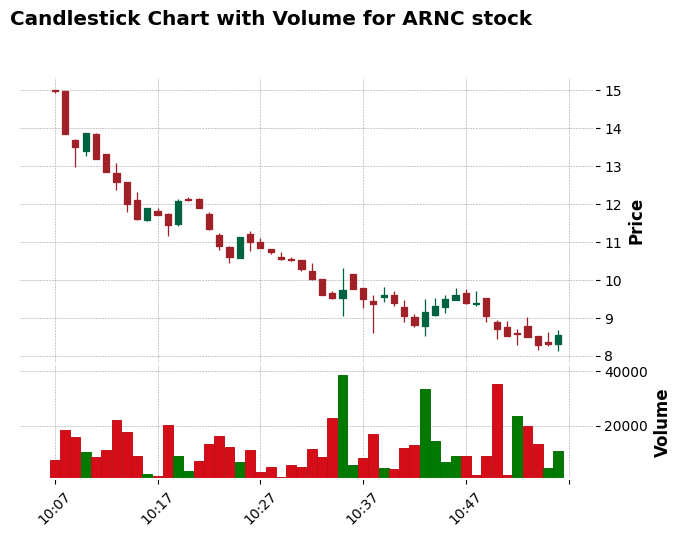

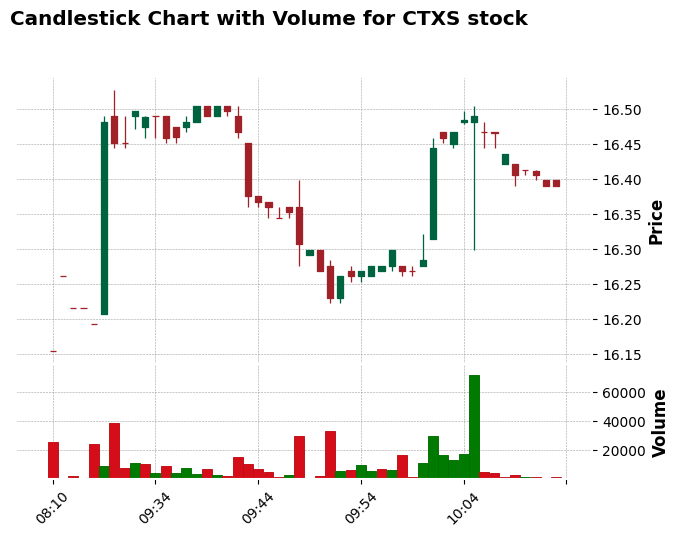

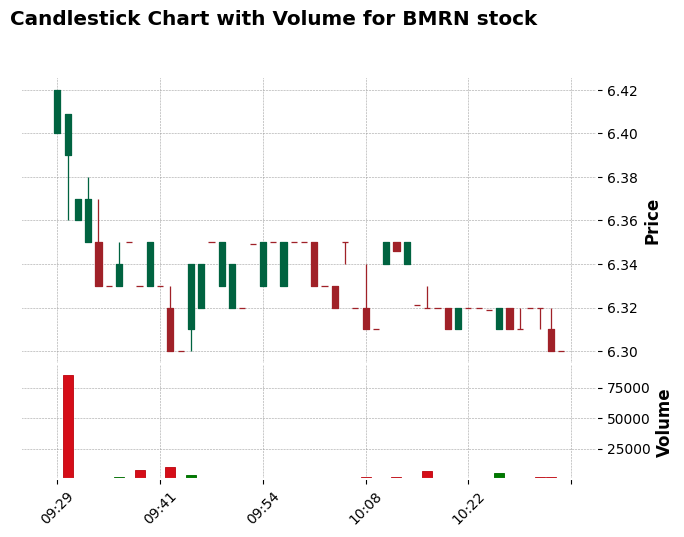

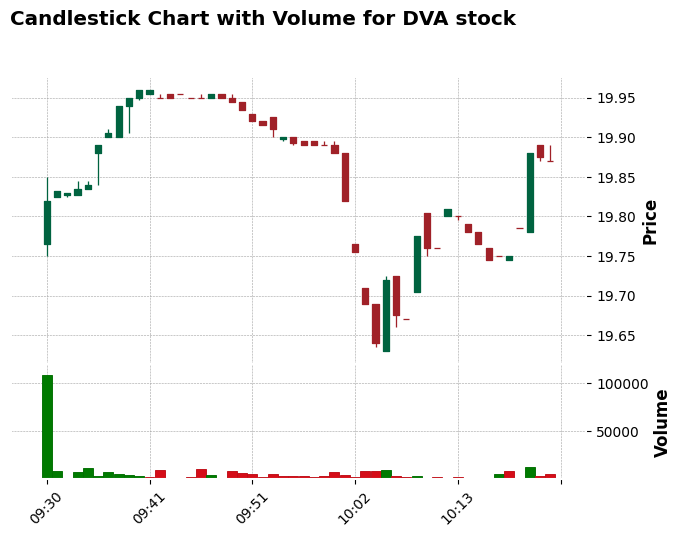

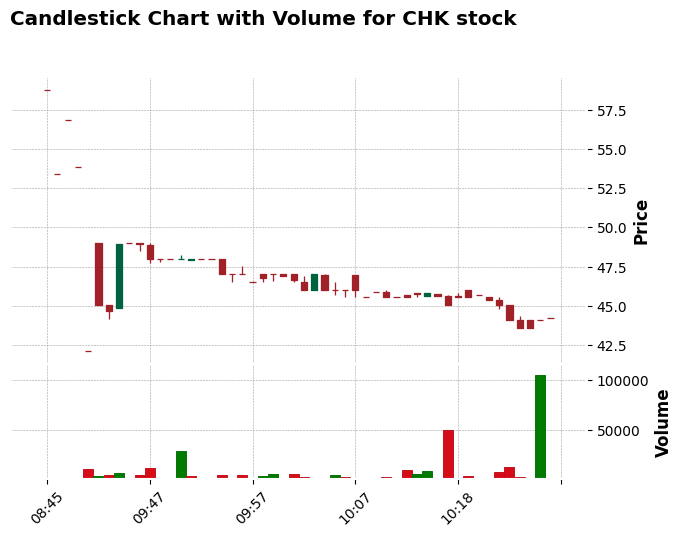

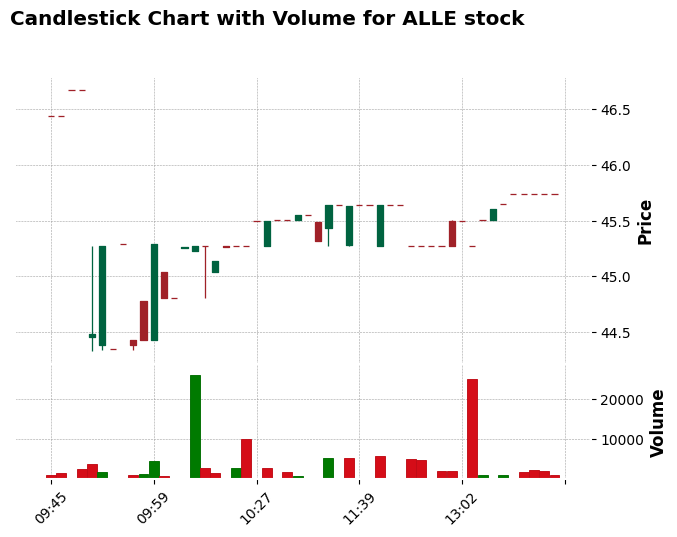

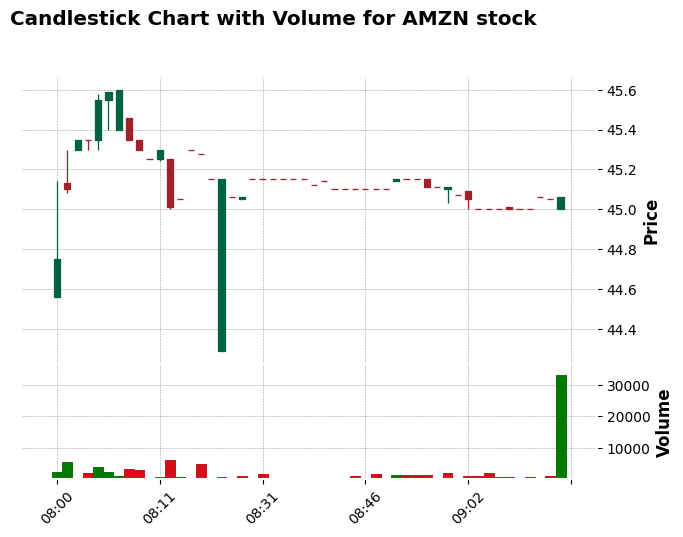

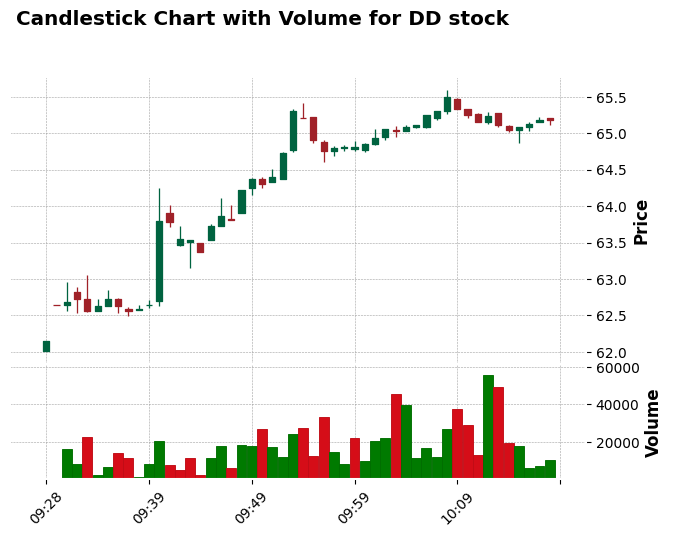

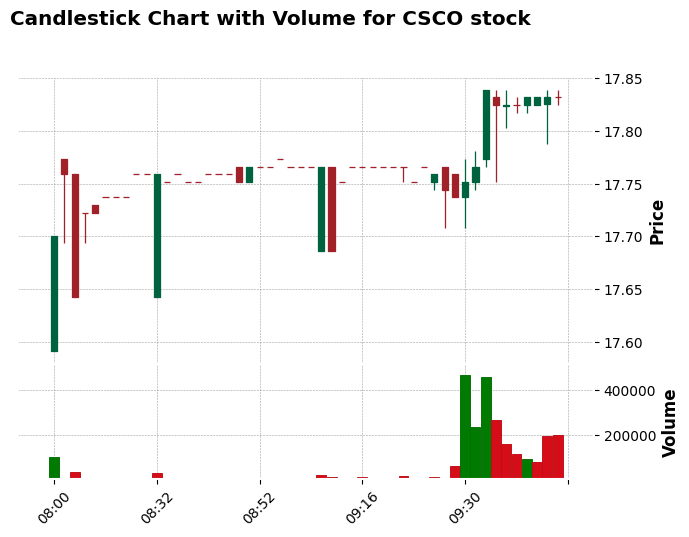

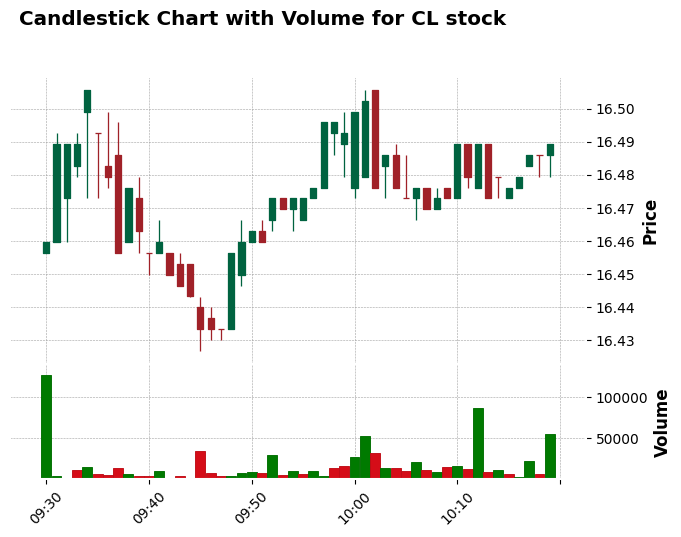

In [8]:
import matplotlib.dates as mdates
import mplfinance as mpf
for nam in dir_list[:10]:
  mpf.plot(globals()[f'{nam[:-9]}'][:50], type='candle', style='charles', volume=True, title=f"Candlestick Chart with Volume for {nam[:-9]} stock ")#plotting candle stick chart
  plt.show()

In [5]:
filee_path = os.path.join(File_paths,'ASH_1min.txt')#joining two paths
filee = open(filee_path,"r")#opening file present at that part
filee.read()#reading the file
ASH = pd.read_csv(filee_path, header=None, names=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], delimiter=',')#reading and coverting txt file to pandas dataframe
ASH['Timestamp'] = pd.to_datetime(ASH['Timestamp'])
ASH.set_index('Timestamp', inplace=True)#making timestamp to index

1-(d)-Note down your observations, e.g. are there any data issues, unexpected jumps

In [10]:
null_cnt = ASH.isnull().sum().sum()#counting null elements
na_cnt = ASH.isna().sum().sum()#counting total na elements

print(null_cnt,na_cnt)#

0 0


2- Try atleast two ways to normalise this data as stock prices and volume changes overtime and are different across companies and pick one by noting your justification.

# **Percentage Change (Returns):**

**Normalization Method:**

Calculate the daily percentage change in stock prices and volume.

**Justification:**

This method allows you to compare the relative price and volume changes across different stocks over time. It expresses the data as a percentage change from the previous day, making it suitable for comparing stocks with different price levels.

#**Z-Score Standardization:**

**Normalization Method:**

Calculate the Z-Score for stock prices and volume separately.
For each data point, subtract the mean of the dataset and then divide by the standard deviation.

**Justification:**

 Z-Score standardization transforms the data into a standard normal distribution with a mean of 0 and a standard deviation of 1. It's useful when you want to identify how far a particular stock's price or volume is from the mean in terms of standard deviations. This can help in identifying outliers and extreme movements.


z-score implementation

In [6]:
# Calculate Z-Scores for stock prices (Open, High, Low, Close)
columns = ['Open', 'High', 'Low','Volume','Close']
for col in columns:
    ASH[f'{col}_Z_Score'] = (ASH[col] - ASH[col].mean()) / ASH[col].std()#value-mean_value/standard_deviation of complete column

# Display the dataframe with Z-Scores
print(ASH)

                        Open     High      Low    Close  Volume  Open_Z_Score  \
Timestamp                                                                       
2005-01-03 09:30:00  20.0579  20.0579  20.0579  20.0579    8214     -0.940007   
2005-01-03 09:31:00  20.0579  20.0579  20.0579  20.0579     996     -0.940007   
2005-01-03 09:32:00  20.0511  20.0511  20.0511  20.0511    1245     -0.940303   
2005-01-03 09:33:00  20.0511  20.0511  20.0442  20.0442    1493     -0.940303   
2005-01-03 09:34:00  20.0476  20.0476  20.0408  20.0408    2489     -0.940456   
...                      ...      ...      ...      ...     ...           ...   
2022-02-25 16:01:00  94.2100  94.2100  94.2100  94.2100     700      2.290007   
2022-02-25 16:02:00  94.2100  94.2100  94.2100  94.2100    1458      2.290007   
2022-02-25 16:10:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 18:30:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 19:00:00  94.2100



High-Frequency Trading (HFT):

Timeframe: High-frequency trading typically involves making numerous trades within seconds or minutes.
Key Metrics: Focusing on very short-term price movements and volume patterns.
Strategies: HFT strategies often include market making, statistical arbitrage, and other algorithmic approaches.
Data Analysis: Look for micro-patterns in price and volume data to identify short-term trading opportunities. Algorithms will execute trades rapidly based on these patterns.

Intra-Day Swing Trading:

Timeframe: Intra-day swing trading involves holding positions for a few hours or a day.
Key Metrics: Look for trends, support/resistance levels, and price patterns within the trading day.
Strategies: Using technical analysis indicators like moving averages, RSI, and MACD to identify entry and exit points.
Data Analysis: Analyzing the data for patterns that can help  making short-term trading decisions. Identifing potential swing trading opportunities based on technical analysis.

Inter-Day Trading:

Timeframe: Inter-day trading involves holding positions for multiple days but not more than a week.
Key Metrics: Pay attention to daily price trends, news events, and macroeconomic factors.
Strategies: Use a combination of technical and fundamental analysis. Look for patterns on daily charts and consider news and earnings reports.
Data Analysis: Analyze the data to identify trends and potential support/resistance levels. Monitor news and events that can impact your trades over a day.

Long-Term Trading (Multi-Day/Week/Month):

Timeframe: Long-term trading involves holding positions for an extended period, ranging from weeks to months or even years.
Key Metrics: Focusing on fundamental analysis, macroeconomic factors, and long-term trends.
Strategies: Research and invest in stocks with strong fundamentals, growth potential, and competitive advantages.
Data Analysis: one can Look for long-term trends, evaluate financial statements, and consider factors like economic conditions, industry trends, and company news.


3-a) intra day

3-b) trade only on one stock

Data precprocessing

In [7]:
import pandas as pd
import numpy as np
ASH_normalised_set = ASH.iloc[:,:]
# 5-minute moving average
ASH_normalised_set['5min_MA'] = ASH_normalised_set['Close_Z_Score'].rolling(window=5).mean()

# 10-minute moving average
ASH_normalised_set['10min_MA'] = ASH_normalised_set['Close_Z_Score'].rolling(window=10).mean()

#  a 20-minute moving average:
ASH_normalised_set['20min_MA'] = ASH_normalised_set['Close_Z_Score'].rolling(window=20).mean()

# Calculating price changes (close-to-close differences)
ASH_normalised_set['Price_Change'] = ASH_normalised_set['Close_Z_Score'].diff()

# Separating positive and negative price changes
ASH_normalised_set['Gain'] = np.where(ASH_normalised_set['Price_Change'] > 0, ASH_normalised_set['Price_Change'], 0)
ASH_normalised_set['Loss'] = np.where(ASH_normalised_set['Price_Change'] < 0, -ASH_normalised_set['Price_Change'], 0)

# Specifying the period for RSI calculation (e.g., 14 periods)
rsi_period = 14

# Calculating average gain and average loss over the specified period
ASH_normalised_set['Avg_Gain'] = ASH_normalised_set['Gain'].rolling(window=rsi_period).mean()
ASH_normalised_set['Avg_Loss'] = ASH_normalised_set['Loss'].rolling(window=rsi_period).mean()

# Calculating relative strength (RS)
ASH_normalised_set['RS'] = ASH_normalised_set['Avg_Gain'] / ASH_normalised_set['Avg_Loss']

# Calculating RSI
ASH_normalised_set['RSI'] = 100 - (100 / (1 + ASH_normalised_set['RS']))

# Filling NaN values (resulting from rolling calculations) with mean
ASH_normalised_set = ASH_normalised_set.fillna(ASH_normalised_set.mean())

# Printing the updated DataFrame with RSI values
print(ASH_normalised_set)


                        Open     High      Low    Close  Volume  Open_Z_Score  \
Timestamp                                                                       
2005-01-03 09:30:00  20.0579  20.0579  20.0579  20.0579    8214     -0.940007   
2005-01-03 09:31:00  20.0579  20.0579  20.0579  20.0579     996     -0.940007   
2005-01-03 09:32:00  20.0511  20.0511  20.0511  20.0511    1245     -0.940303   
2005-01-03 09:33:00  20.0511  20.0511  20.0442  20.0442    1493     -0.940303   
2005-01-03 09:34:00  20.0476  20.0476  20.0408  20.0408    2489     -0.940456   
...                      ...      ...      ...      ...     ...           ...   
2022-02-25 16:01:00  94.2100  94.2100  94.2100  94.2100     700      2.290007   
2022-02-25 16:02:00  94.2100  94.2100  94.2100  94.2100    1458      2.290007   
2022-02-25 16:10:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 18:30:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 19:00:00  94.2100

In [8]:
ASH_final_normalised_set = ASH_normalised_set[['Open_Z_Score', 'High_Z_Score', 'Low_Z_Score','Volume_Z_Score','5min_MA','10min_MA','20min_MA','RSI','Close_Z_Score']]
print(ASH_final_normalised_set)

                     Open_Z_Score  High_Z_Score  Low_Z_Score  Volume_Z_Score  \
Timestamp                                                                      
2005-01-03 09:30:00     -0.940007     -0.940405    -0.939612        0.274471   
2005-01-03 09:31:00     -0.940007     -0.940405    -0.939612       -0.233791   
2005-01-03 09:32:00     -0.940303     -0.940702    -0.939909       -0.216257   
2005-01-03 09:33:00     -0.940303     -0.940702    -0.940209       -0.198794   
2005-01-03 09:34:00     -0.940456     -0.940854    -0.940357       -0.128660   
...                           ...           ...          ...             ...   
2022-02-25 16:01:00      2.290007      2.289047     2.290990       -0.254634   
2022-02-25 16:02:00      2.290007      2.289047     2.290990       -0.201259   
2022-02-25 16:10:00      2.290007      2.289047     2.290990       -0.303925   
2022-02-25 18:30:00      2.290007      2.289047     2.290990       -0.303925   
2022-02-25 19:00:00      2.290007      2

Train-test splitting

In [9]:
test_fraction = 0.2#test data fraction
split_index = int(len(ASH_final_normalised_set) * (1 - test_fraction))
ASH_normalised_train_val_set = ASH_final_normalised_set.iloc[:split_index]
ASH_normalised_test_set = ASH_final_normalised_set.iloc[split_index:]
print(ASH_normalised_train_val_set)
print(ASH_normalised_test_set)

                     Open_Z_Score  High_Z_Score  Low_Z_Score  Volume_Z_Score  \
Timestamp                                                                      
2005-01-03 09:30:00     -0.940007     -0.940405    -0.939612        0.274471   
2005-01-03 09:31:00     -0.940007     -0.940405    -0.939612       -0.233791   
2005-01-03 09:32:00     -0.940303     -0.940702    -0.939909       -0.216257   
2005-01-03 09:33:00     -0.940303     -0.940702    -0.940209       -0.198794   
2005-01-03 09:34:00     -0.940456     -0.940854    -0.940357       -0.128660   
...                           ...           ...          ...             ...   
2018-03-19 11:27:00      1.205114      1.208894     1.203003       -0.156052   
2018-03-19 11:28:00      1.209462      1.208689     1.207969       -0.111549   
2018-03-19 11:29:00      1.203873      1.205170     1.203003       -0.217454   
2018-03-19 11:30:00      1.202632      1.205170     1.203417       -0.282800   
2018-03-19 11:31:00      1.208425      1

In [10]:
import pandas as pd
import numpy as np

# Defining a threshold for outliers
threshold = 1.5

# Calculating Q1 and Q3 for each feature
Q1 = ASH_normalised_train_val_set.quantile(0.25)
Q3 = ASH_normalised_train_val_set.quantile(0.75)

# Calculating the IQR for each feature
IQR = Q3 - Q1

# Identifing outliers using the threshold
outliers = ((ASH_normalised_train_val_set < (Q1 - threshold * IQR)) | (ASH_normalised_train_val_set > (Q3 + threshold * IQR))).any(axis=1)

# Remove rows with outliers
ASH_normalised_train_val_set_cleaned = ASH_normalised_train_val_set[~outliers]

ASH_normalised_train_val_set_cleaned.reset_index(drop=True, inplace=True)
print(ASH_normalised_train_val_set_cleaned)
print(ASH_normalised_train_val_set)

         Open_Z_Score  High_Z_Score  Low_Z_Score  Volume_Z_Score   5min_MA  \
0           -0.940007     -0.940405    -0.939612        0.274471 -0.000002   
1           -0.940007     -0.940405    -0.939612       -0.233791 -0.000002   
2           -0.940303     -0.940702    -0.939909       -0.216257 -0.000002   
3           -0.940303     -0.940702    -0.940209       -0.198794 -0.000002   
4           -0.940456     -0.940854    -0.940357       -0.128660 -0.940338   
...               ...           ...          ...             ...       ...   
1087712      1.205114      1.208894     1.203003       -0.156052  1.203292   
1087713      1.209462      1.208689     1.207969       -0.111549  1.204591   
1087714      1.203873      1.205170     1.203003       -0.217454  1.204922   
1087715      1.202632      1.205170     1.203417       -0.282800  1.205749   
1087716      1.208425      1.207653     1.207765       -0.268717  1.206288   

         10min_MA  20min_MA        RSI  Close_Z_Score  
0      

End of data preprocessing

q5. LSTM unit architechture

In [11]:
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.4):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,  # Input data will be of shape (batch_size, sequence_length, input_size)
            dropout=dropout_prob if num_layers > 1 else 0
        )

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through LSTM layers
        lstm_out, _ = self.lstm(x)

        # Taking the output from the last time step
        lstm_out = lstm_out[:, -1, :]

        # Forward pass through the fully connected layer
        output = self.fc(lstm_out)

        return output


q5&6. Dataloader and Time Series Split Cross-Validation and training of model and predicting values for prediction horizon variable

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import sys
import time

# Define your FlexibleLSTM model as mentioned earlier
class TimeSeriesDataset(Dataset):
    def __init__(self, data, sequence_length, prediction_horizon):
        self.data = data.values  # Convert DataFrame to NumPy array
        self.sequence_length = sequence_length#length of sequence
        self.prediction_horizon  = prediction_horizon#prediction variable index - end of sequence x

    def __len__(self):
        return len(self.data) - self.sequence_length-self.prediction_horizon

    def __getitem__(self, idx):
        # Extract a sequence of data
        # Choose the lookback period (number of previous time steps for input)
        # Choose the prediction horizon (number of future time steps to predict)
        x = self.data[idx:idx+self.sequence_length, :-1]  # Input sequence (all columns except the last one)
        y = self.data[idx+self.sequence_length+self.prediction_horizon-1, -1]       # Target (last column)

        return torch.FloatTensor(x), torch.FloatTensor([y])#input variable x and prediction variable y

def print_progress_bar(iteration, total, bar_length=50):#printing progress bar at each epoch
    progress = (iteration / total)
    arrow = '->' * int(round(bar_length * progress))
    spaces = ' ' * (bar_length - len(arrow))
    sys.stdout.write(f'\r[{arrow}{spaces}] {int(progress * 100)}% Complete')
    sys.stdout.flush()

#hyperparameters
input_size = 8  # Number of features in the input data
hidden_size = 10  # Number of LSTM units in each layer
num_layers = 3  # Number of LSTM layers
output_size = 1  # Number of output units (e.g., for regression tasks)
learning_rate = 0.001#learning rate
num_epochs = 10 # number of epochs
sequence_length = 10
prediction_horizon = 2
# Initialize the model
model = LSTM(input_size, hidden_size, num_layers, output_size)#defining model

# Defining loss function (e.g., Mean Squared Error) and optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
early_stopping_patience = 5 # Number of epochs with no improvement to wait before early stopping
no_improvement_count = 0 # Initialize the counter for early stopping
# Initialize variables for tracking the best model
best_val_loss = float('inf')  # Set to positive infinity initially
best_model_path = '/content/drive/MyDrive/best_model.pth'  # File path to save the best model
# Training loop

# Defining the number of epochs and number of folds for cross-validation
num_epochs = 3
num_folds = 4
fold = 0
base=362564*2
final_indx=base+90641
# Perform k-fold cross-validation

# Example usage
# Defining L1 or L2 regularization strength
l1_lambda = 0.001  # Set to 0 for no L1 regularization
l2_lambda = 0.001  # Set to 0 for no L2 regularization

while final_indx<=len(ASH_normalised_train_val_set_cleaned):
    train_data = ASH_normalised_train_val_set_cleaned.iloc[0:base]#indexing train data till base index
    val_data = ASH_normalised_train_val_set_cleaned.iloc[base:final_indx]#indexing validation data from base index to final index
    base=final_indx
    final_indx+=90641#incrementing final index such that previously validation set now comes under training set and new validation set
    print(f"Fold ---> {fold + 1}/{num_folds}")
    fold+=1
    # Create DataLoader for training and validation sets
    train_dataset = TimeSeriesDataset(train_data, sequence_length,prediction_horizon)#getting training x and y values
    val_dataset = TimeSeriesDataset(val_data, sequence_length,prediction_horizon)#getting vlidation x and y values

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)#loading trainig data through dataloader function with batch size of 32 length
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)#loading test data through dataloader function with batch size of 32 length

    for epoch in range(num_epochs):
        # Training loop
        model.train()
        iteration=0
        train_losses = []
        print(f'Epoch [{epoch+1}/{num_epochs}] started -->')
        for features, target in train_loader:

            # Forward pass
            outputs = model(features)#predicting y values from features

            # Compute the loss
            loss = criterion(outputs, target)#computing loss

            if l1_lambda > 0:#L1 regularization
                l1_reg = torch.tensor(0.0)
                for param in model.parameters():
                    l1_reg += torch.norm(param, 1)#loss=loss+summation(l1_reg*|w_i^1|)
                loss += l1_lambda * l1_reg

            if l2_lambda > 0:
                l2_reg = torch.tensor(0.0)
                for param in model.parameters():
                    l2_reg += torch.norm(param, 2)
                loss += 0.5 * l2_lambda * l2_reg#loss=loss+summation(l2_reg*w_i^2)
            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            print_progress_bar(iteration + 1, len(train_loader))#using print pregress function for showing epoch progress
            train_losses.append(loss.item())#appebding training losses
            iteration += 1
        avg_train_loss = sum(train_losses) / len(train_losses)#calculating mean training loss
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}')

        # Validation loop
        model.eval()
        val_losses = []
        with torch.no_grad():
            for val_inputs, val_targets in val_loader:
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_targets)#computing validation loss
                val_losses.append(val_loss.item())#appending validation losses

        # Calculate and print validation loss
        avg_val_loss = sum(val_losses) / len(val_losses)#computing mean validation loss
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}')

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)#saving best model
           # no_improvement_count = 0
            print("Above model is currently saved ")
     #   else:
         #   no_improvement_count += 1

        # Early stopping: If no improvement for 'early_stopping_patience' epochs, stop training
 #       if no_improvement_count >= early_stopping_patience:
       #     print("Early stopping: No improvement in validation loss for {} epochs.".format(early_stopping_patience))
         #   break

        # Save the current model at the end of each epoch



print("Cross-validation completed.")


Fold ---> 1/4
Epoch [1/3] started -->
[->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->] 100% CompleteEpoch [1/3], Training Loss: 0.0342
Epoch [1/3], Validation Loss: 0.0741
Above model is currently saved 
Epoch [2/3] started -->
[->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->] 100% CompleteEpoch [2/3], Training Loss: 0.0216
Epoch [2/3], Validation Loss: 0.0443
Above model is currently saved 
Epoch [3/3] started -->
[->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->] 100% CompleteEpoch [3/3], Training Loss: 0.0216
Epoch [3/3], Validation Loss: 0.0567
Fold ---> 2/4
Epoch [1/3] started -->
[->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->] 100% CompleteEpoch [1/3], Training Loss: 0.0250
Epoch [1/3], Validation Loss: 0.0920
Epoch [2/3] started -->
[->->->->->->->->->->->->->->->->->-

Test dataset preprocessing removing outliers

In [12]:
import pandas as pd
import numpy as np


# Define a threshold for outliers
threshold = 1.5

# Calculate Q1 and Q3 for each feature
Q1 = ASH_normalised_test_set.quantile(0.25)
Q3 = ASH_normalised_test_set.quantile(0.75)

# Calculate the IQR for each feature
IQR = Q3 - Q1

# Identify outliers using the threshold
outliers = ((ASH_normalised_test_set < (Q1 - threshold * IQR)) | (ASH_normalised_test_set > (Q3 + threshold * IQR))).any(axis=1)
# Remove rows with outliers
ASH_normalised_test_set_cleaned = ASH_normalised_test_set[~outliers]

ASH_normalised_test_set_cleaned.reset_index(drop=True, inplace=True)
print(ASH_normalised_test_set_cleaned)

        Open_Z_Score  High_Z_Score  Low_Z_Score  Volume_Z_Score   5min_MA  \
0           1.207597      1.207653     1.205900       -0.233509  1.205501   
1           1.205528      1.209721     1.206314       -0.182598  1.206163   
2           1.211735      1.212618     1.210453       -0.191260  1.207653   
3           1.211322      1.210549     1.210039       -0.191260  1.208315   
4           1.208839      1.212204     1.209211       -0.170135  1.209515   
...              ...           ...          ...             ...       ...   
251291      2.290007      2.289047     2.290990       -0.254634  2.289463   
251292      2.290007      2.289047     2.290990       -0.201259  2.288897   
251293      2.290007      2.289047     2.290990       -0.303925  2.289942   
251294      2.290007      2.289047     2.290990       -0.303925  2.290029   
251295      2.290007      2.289047     2.290990       -0.303925  2.290029   

        10min_MA  20min_MA        RSI  Close_Z_Score  
0       1.204396  1.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, data, sequence_length, prediction_horizon):
        self.data = data.values  # Convert DataFrame to NumPy array
        self.sequence_length = sequence_length
        self.prediction_horizon  = prediction_horizon

    def __len__(self):
        return len(self.data) - self.sequence_length-self.prediction_horizon

    def __getitem__(self, idx):
        # Extract a sequence of data
        # Choose the lookback period (number of previous time steps for input)
        # Choose the prediction horizon (number of future time steps to predict)
        x = self.data[idx:idx+self.sequence_length, :-1]  # Input sequence (all columns except the last one)
        y = self.data[idx+self.sequence_length+self.prediction_horizon-1, -1]       # Target (last column)

        return torch.FloatTensor(x), torch.FloatTensor([y])

sequence_length = 10  # Adjust this based on your desired sequence length
prediction_horizon = 2
test_data = ASH_normalised_test_set_cleaned
test_dataset = TimeSeriesDataset(test_data, sequence_length,prediction_horizon)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)#using dataloader to load test data into batches sequentially

In [14]:
input_size = 8  # Number of features in the input data
hidden_size = 10  # Number of LSTM units in each layer
num_layers = 3  # Number of LSTM layers
output_size = 1  # Number of output units (e.g., for regression tasks)
sequence_length = 10
prediction_horizon = 2

best_model_path = '/content/drive/MyDrive/best_model.pth'  # File path to save the best model
model = LSTM(input_size, hidden_size, num_layers, output_size)

Test data mean square error computation

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Load the trained model
model.load_state_dict(torch.load(best_model_path))  # Load the best model

# Define loss function (e.g., Mean Squared Error)
criterion = nn.MSELoss()

# Evaluate the model on the test data
model.eval()  # Set the model to evaluation mode

# Lists to store actual and predicted values
actual_values = []
predicted_values = []

with torch.no_grad():  # Disable gradient computation during evaluation
    for inputs, targets in test_loader:
        # Forward pass
        outputs = model(inputs)

        # Compute loss (MSE)
        loss = criterion(-outputs, targets)

        # Convert predictions and targets to NumPy arrays
        predicted_values.extend(outputs.cpu().numpy())
        actual_values.extend(targets.cpu().numpy())

# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')


Mean Absolute Error (MAE): 0.7737
Mean Squared Error (MSE): 0.7029


In [16]:
array1 = np.array(actual_values)
array2 = np.array(predicted_values)

error= np.subtract(array1, array2)
error = list(error)

In [17]:
print(ASH_normalised_test_set_cleaned)

        Open_Z_Score  High_Z_Score  Low_Z_Score  Volume_Z_Score   5min_MA  \
0           1.207597      1.207653     1.205900       -0.233509  1.205501   
1           1.205528      1.209721     1.206314       -0.182598  1.206163   
2           1.211735      1.212618     1.210453       -0.191260  1.207653   
3           1.211322      1.210549     1.210039       -0.191260  1.208315   
4           1.208839      1.212204     1.209211       -0.170135  1.209515   
...              ...           ...          ...             ...       ...   
251291      2.290007      2.289047     2.290990       -0.254634  2.289463   
251292      2.290007      2.289047     2.290990       -0.201259  2.288897   
251293      2.290007      2.289047     2.290990       -0.303925  2.289942   
251294      2.290007      2.289047     2.290990       -0.303925  2.290029   
251295      2.290007      2.289047     2.290990       -0.303925  2.290029   

        10min_MA  20min_MA        RSI  Close_Z_Score  
0       1.204396  1.

In [18]:
close_price_pred = {"Closing_price_z_score":predicted_values,
                    "actual_closing_price_z_score":actual_values,
                    "error":error}
pred_closing_price = pd.DataFrame.from_dict(close_price_pred )#making dataframe for predicted and actual price

pred_closing_price['Price_Change'] = pred_closing_price["Closing_price_z_score"].diff()#computing difference between adjacent closing prices

# Separating positive and negative price changes
pred_closing_price['Gain'] = np.where(pred_closing_price['Price_Change'] > 0, pred_closing_price['Price_Change'], 0)
pred_closing_price['Loss'] = np.where(pred_closing_price['Price_Change'] < 0, -pred_closing_price['Price_Change'], 0)

# Specifing the period for RSI calculation (e.g., 14 periods)
rsi_period = 14

# Calculating average gain and average loss over the specified period
pred_closing_price['Avg_Gain'] = pred_closing_price['Gain'].rolling(window=rsi_period).mean()
pred_closing_price['Avg_Loss'] = pred_closing_price['Loss'].rolling(window=rsi_period).mean()

# Calculating relative strength (RS)
pred_closing_price['RS'] = pred_closing_price['Avg_Gain'] / pred_closing_price['Avg_Loss']

# Calculating RSI
pred_closing_price['RSI'] = 100 - (100 / (1 + pred_closing_price['RS']))

# Filling NaN values with mean (resulting from rolling calculations)
pred_closing_price = pred_closing_price.fillna(pred_closing_price.mean())
print(pred_closing_price)

       Closing_price_z_score actual_closing_price_z_score         error  \
0               [0.72017443]                  [1.2171289]  [0.49695444]   
1                [0.7207171]                  [1.2179565]  [0.49723947]   
2                [0.7206454]                  [1.2150598]  [0.49441433]   
3                [0.7204181]                  [1.2150598]  [0.49464166]   
4               [0.72063756]                  [1.2142322]  [0.49359465]   
...                      ...                          ...           ...   
251279          [0.84938943]                  [2.2922075]    [1.442818]   
251280            [0.848186]                  [2.2900295]   [1.4418435]   
251281           [0.8467221]                  [2.2900295]   [1.4433074]   
251282          [0.84506357]                  [2.2900295]    [1.444966]   
251283           [0.8450302]                  [2.2900295]   [1.4449993]   

            Price_Change            Gain             Loss  Avg_Gain  Avg_Loss  \
0                 

In [19]:
test_fraction = 0.2
split_index = int(len(ASH_normalised_set) * (1 - test_fraction))
ASH_test_set = ASH_normalised_set.iloc[split_index:]
print(ASH_test_set)
#ASH_normalised_set[['Close']]

                        Open     High      Low    Close  Volume  Open_Z_Score  \
Timestamp                                                                       
2018-03-19 11:32:00  69.3609  69.3799  69.3039  69.3039    1000      1.207597   
2018-03-19 11:33:00  69.3134  69.4274  69.3134  69.4274    1723      1.205528   
2018-03-19 11:34:00  69.4559  69.4939  69.4084  69.4084    1600      1.211735   
2018-03-19 11:35:00  69.4464  69.4464  69.3989  69.3989    1600      1.211322   
2018-03-19 11:36:00  69.3894  69.4844  69.3799  69.4844    1900      1.208839   
...                      ...      ...      ...      ...     ...           ...   
2022-02-25 16:01:00  94.2100  94.2100  94.2100  94.2100     700      2.290007   
2022-02-25 16:02:00  94.2100  94.2100  94.2100  94.2100    1458      2.290007   
2022-02-25 16:10:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 18:30:00  94.2100  94.2100  94.2100  94.2100       0      2.290007   
2022-02-25 19:00:00  94.2100

Q7. write a trading module to sell, buy and hold assets.

In [20]:
import pandas as pd


short_window = 50  # Short moving average window
long_window = 200  # Long moving average window
initial_balance = 10000  # Initial balance in USD
buy_threshold = 0.7  # Buy if short MA crosses above long MA and RSI > buy_threshold
sell_threshold = 0.3  # Sell if short MA crosses below long MA or RSI < sell_threshold

# Initialize variables
balance = initial_balance
shares_held = 0
portfolio_value = []
decisions = []
# Calculate moving averages
pred_closing_price['Short_MA'] = pred_closing_price["Closing_price_z_score"].rolling(window=short_window).mean()
pred_closing_price['Long_MA'] = pred_closing_price["Closing_price_z_score"].rolling(window=long_window).mean()
pred_closing_price = pred_closing_price.fillna(pred_closing_price.mean())
# Create a function to make trading decisions
def make_decision(row):
    global balance, shares_held
    if row['Short_MA'] > row['Long_MA'] or row['RSI'] > buy_threshold:
        # Buy decision
        if balance > row['Closing_price_z_score']:
            shares_to_buy = balance // row["Closing_price_z_score"]
            cost = shares_to_buy * row["Closing_price_z_score"]
            shares_held += shares_to_buy
            balance -= cost
            decisions.append('Buy')
        else:
          decisions.append('Hold')
    elif row['Short_MA'] < row['Long_MA'] or row['RSI'] < sell_threshold:
        # Sell decision
        if shares_held > 0:
            revenue = shares_held * row["Closing_price_z_score"]
            balance += revenue
            shares_held = 0
            decisions.append('Sell')
        else:
          decisions.append('Hold')
    else:
      decisions.append('Hold')
    portfolio_value.append(balance + (shares_held * row["Closing_price_z_score"]))

# Applying the decision function to each row
pred_closing_price.apply(make_decision, axis=1)

# Add portfolio value to DataFrame
pred_closing_price['Portfolio_Value'] = portfolio_value
pred_closing_price['Decisions'] = decisions
# Print the final portfolio value
print(pred_closing_price)
print(f"Final Portfolio Value: ${pred_closing_price['Portfolio_Value'].iloc[-1]}")


       Closing_price_z_score actual_closing_price_z_score         error  \
0               [0.72017443]                  [1.2171289]  [0.49695444]   
1                [0.7207171]                  [1.2179565]  [0.49723947]   
2                [0.7206454]                  [1.2150598]  [0.49441433]   
3                [0.7204181]                  [1.2150598]  [0.49464166]   
4               [0.72063756]                  [1.2142322]  [0.49359465]   
...                      ...                          ...           ...   
251279          [0.84938943]                  [2.2922075]    [1.442818]   
251280            [0.848186]                  [2.2900295]   [1.4418435]   
251281           [0.8467221]                  [2.2900295]   [1.4433074]   
251282          [0.84506357]                  [2.2900295]    [1.444966]   
251283           [0.8450302]                  [2.2900295]   [1.4449993]   

            Price_Change            Gain             Loss  Avg_Gain  Avg_Loss  \
0                 

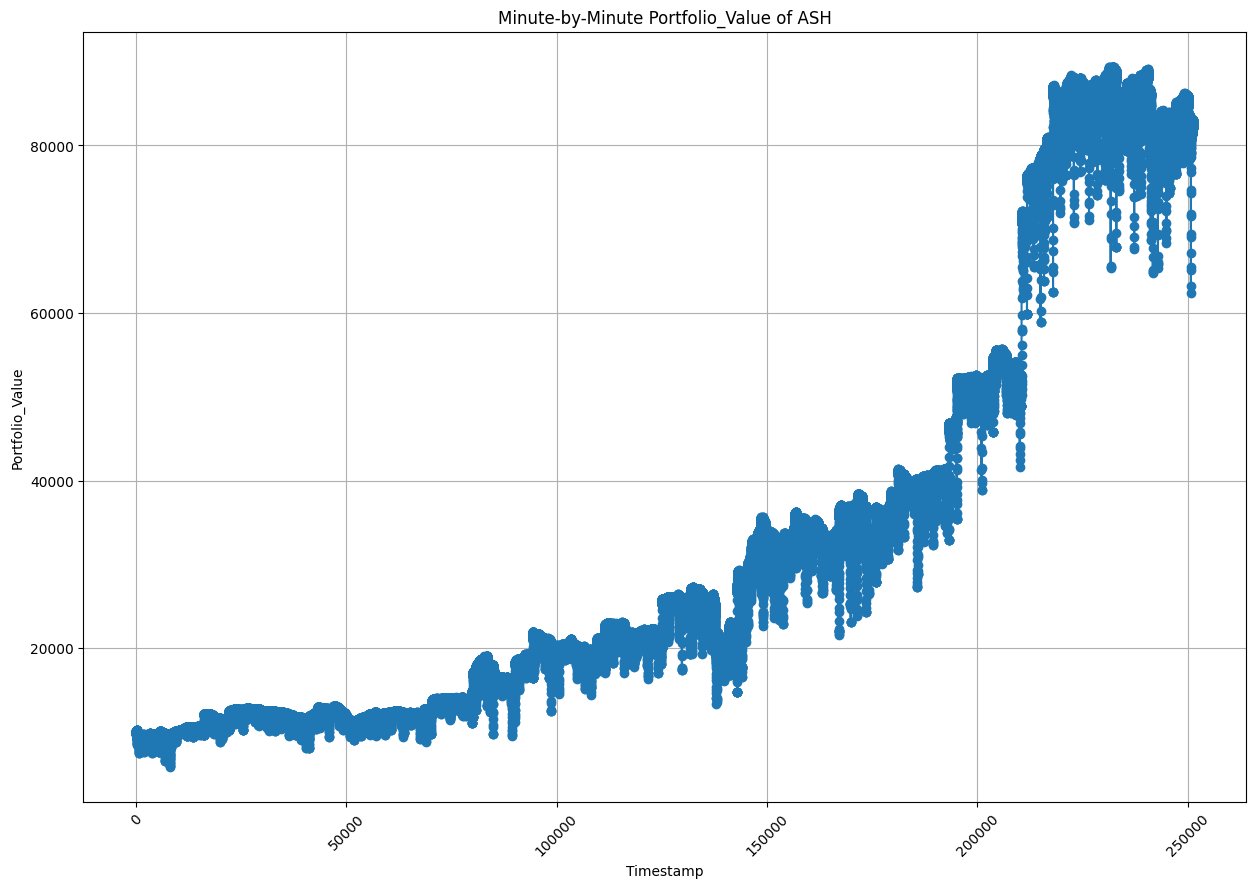

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(pred_closing_price.index[:], pred_closing_price['Portfolio_Value'][:], marker='o', linestyle='-')#plotting time stamp vs minute by minute portfolio value
plt.title(f'Minute-by-Minute Portfolio_Value of ASH')
plt.xlabel('Timestamp')
plt.ylabel('Portfolio_Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



Q8. a) does the price prediction error incrases as you go futher

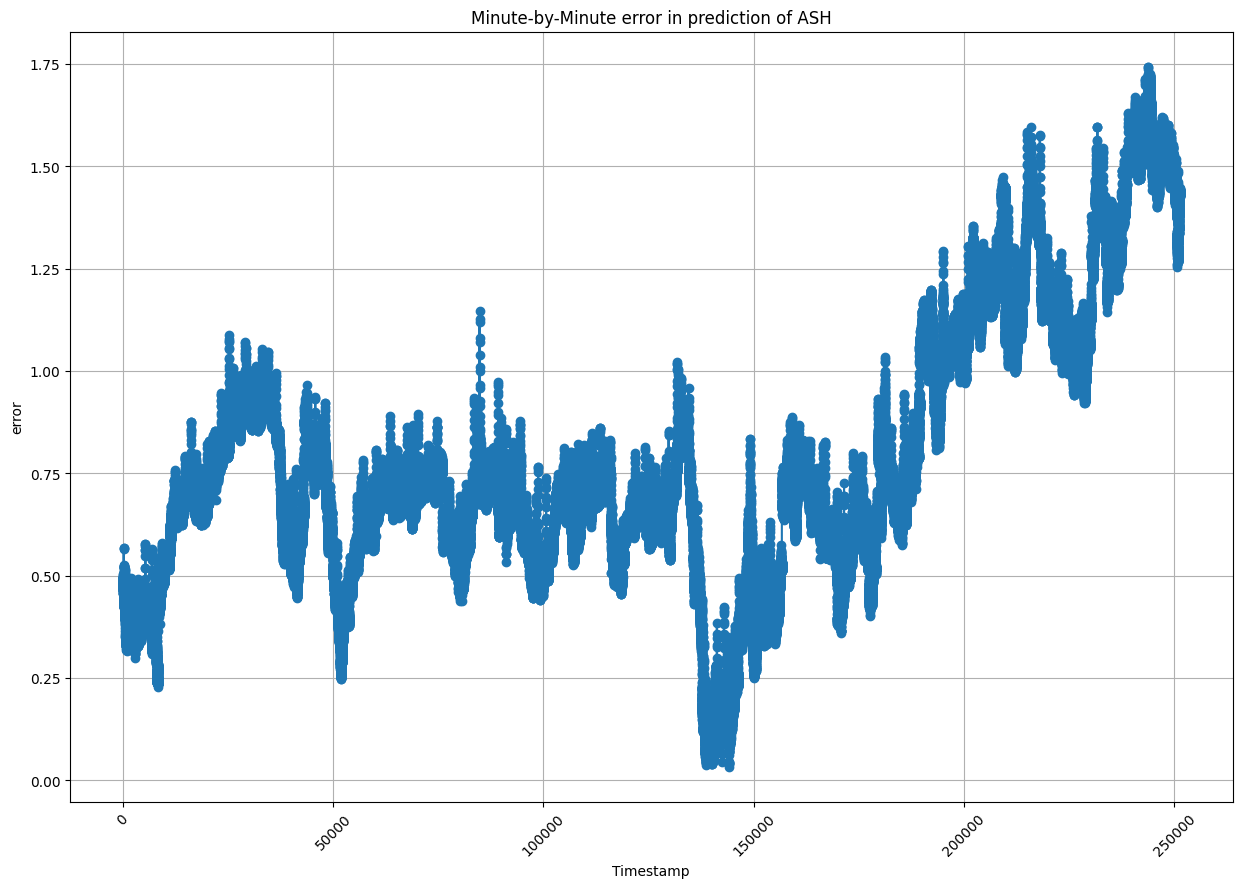

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(pred_closing_price.index[:], pred_closing_price['error'][:], marker='o', linestyle='-')
plt.title(f'Minute-by-Minute error in prediction of ASH')
plt.xlabel('Timestamp')
plt.ylabel('error')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



Yes, from the above graph Prediction error increases as i go further from the time it was trained

Q8.b) can you profitably trade taking bid ask spreads and commisions into account?\
yes, from above final portfolio value which is approx \$82500 given intial amout was nearly $10000 we can see nearly 8 times profit from above strategy.

In [35]:
import pandas as pd


short_window = 50  # Short moving average window
long_window = 200  # Long moving average window
initial_balance = 10000  # Initial balance in USD
buy_threshold = 0.7  # Buy if short MA crosses above long MA and RSI > buy_threshold
sell_threshold = 0.3  # Sell if short MA crosses below long MA or RSI < sell_threshold

# Initialize variables
balance = initial_balance
shares_held = 0
portfolio_value = []
decisions = []
# Calculate moving averages
close_price_pred2 = {"Closing_price_z_score":predicted_values,
                    "actual_closing_price_z_score":actual_values,
                    "error":error}
pred2_closing_price = pd.DataFrame.from_dict(close_price_pred2 )#making dataframe for predicted and actual price
pred2_closing_price['Short_MA'] = pred_closing_price["Closing_price_z_score"].rolling(window=short_window).mean()
pred2_closing_price['Long_MA'] = pred_closing_price["Closing_price_z_score"].rolling(window=long_window).mean()
pred2_closing_price['RSI'] = pred_closing_price['RSI']
pred2_closing_price = pred2_closing_price.fillna(pred2_closing_price.mean())
# Create a function to make trading decisions
def make_decision(row):
    global balance, shares_held
    if row['Short_MA'] > row['Long_MA'] or row['RSI'] > buy_threshold:
        # Buy decision
        if balance > row['Closing_price_z_score']:
            shares_to_buy = balance // row["Closing_price_z_score"]
            cost = shares_to_buy * row["Closing_price_z_score"]
            shares_held += shares_to_buy
            balance -= cost
            decisions.append('Buy')
        else:
          decisions.append('Hold')
    elif row["Closing_price_z_score"] == 0.8450302:
      revenue = shares_held * row["Closing_price_z_score"]
      balance += revenue
      shares_held = 0
      decisions.append('Sell')
    else:
      decisions.append('Hold')
    portfolio_value.append(balance + (shares_held * row["Closing_price_z_score"]))

# Applying the decision function to each row
pred2_closing_price.apply(make_decision, axis=1)

# Add portfolio value to DataFrame
pred2_closing_price['Portfolio_Value'] = portfolio_value
pred2_closing_price['Decisions'] = decisions
# Print the final portfolio value
print(pred2_closing_price)
print(f"Final Portfolio Value: ${pred2_closing_price['Portfolio_Value'].iloc[-1]}")


       Closing_price_z_score actual_closing_price_z_score         error  \
0               [0.72017443]                  [1.2171289]  [0.49695444]   
1                [0.7207171]                  [1.2179565]  [0.49723947]   
2                [0.7206454]                  [1.2150598]  [0.49441433]   
3                [0.7204181]                  [1.2150598]  [0.49464166]   
4               [0.72063756]                  [1.2142322]  [0.49359465]   
...                      ...                          ...           ...   
251279          [0.84938943]                  [2.2922075]    [1.442818]   
251280            [0.848186]                  [2.2900295]   [1.4418435]   
251281           [0.8467221]                  [2.2900295]   [1.4433074]   
251282          [0.84506357]                  [2.2900295]    [1.444966]   
251283           [0.8450302]                  [2.2900295]   [1.4449993]   

        Short_MA   Long_MA        RSI Portfolio_Value Decisions  
0       0.766174  0.766165  51.80

Q8.c) what is profitability with simple buy and sell strategy for two years?\
profitabilty is around $1734
